In [1]:
import string
import wordcloud
import pandas as pd
import numpy as np
import seaborn as sns
from itertools import product
import matplotlib.pyplot as plt
from britain_elects_utils import (parties,
                                  read_data,
                                  process_wvi_data,
                                  null_values_plot,
                                  plot_vote_intention)
from polling_report_history import read_historical_polling_report
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv("./britain_elects_all/britain_elects_all.csv", index_col=0)
chars_to_keep = string.ascii_letters + string.digits + "%- "
df["full_text"] = df["full_text"].str.replace("\n", " ")
df["full_text"] = df["full_text"].apply(lambda x: ''.join([char for char in x if char in chars_to_keep]).lower())

In [3]:
wcloud = wordcloud.WordCloud(background_color='white', width=1500, height=800).generate(' '.join(df["full_text"]))

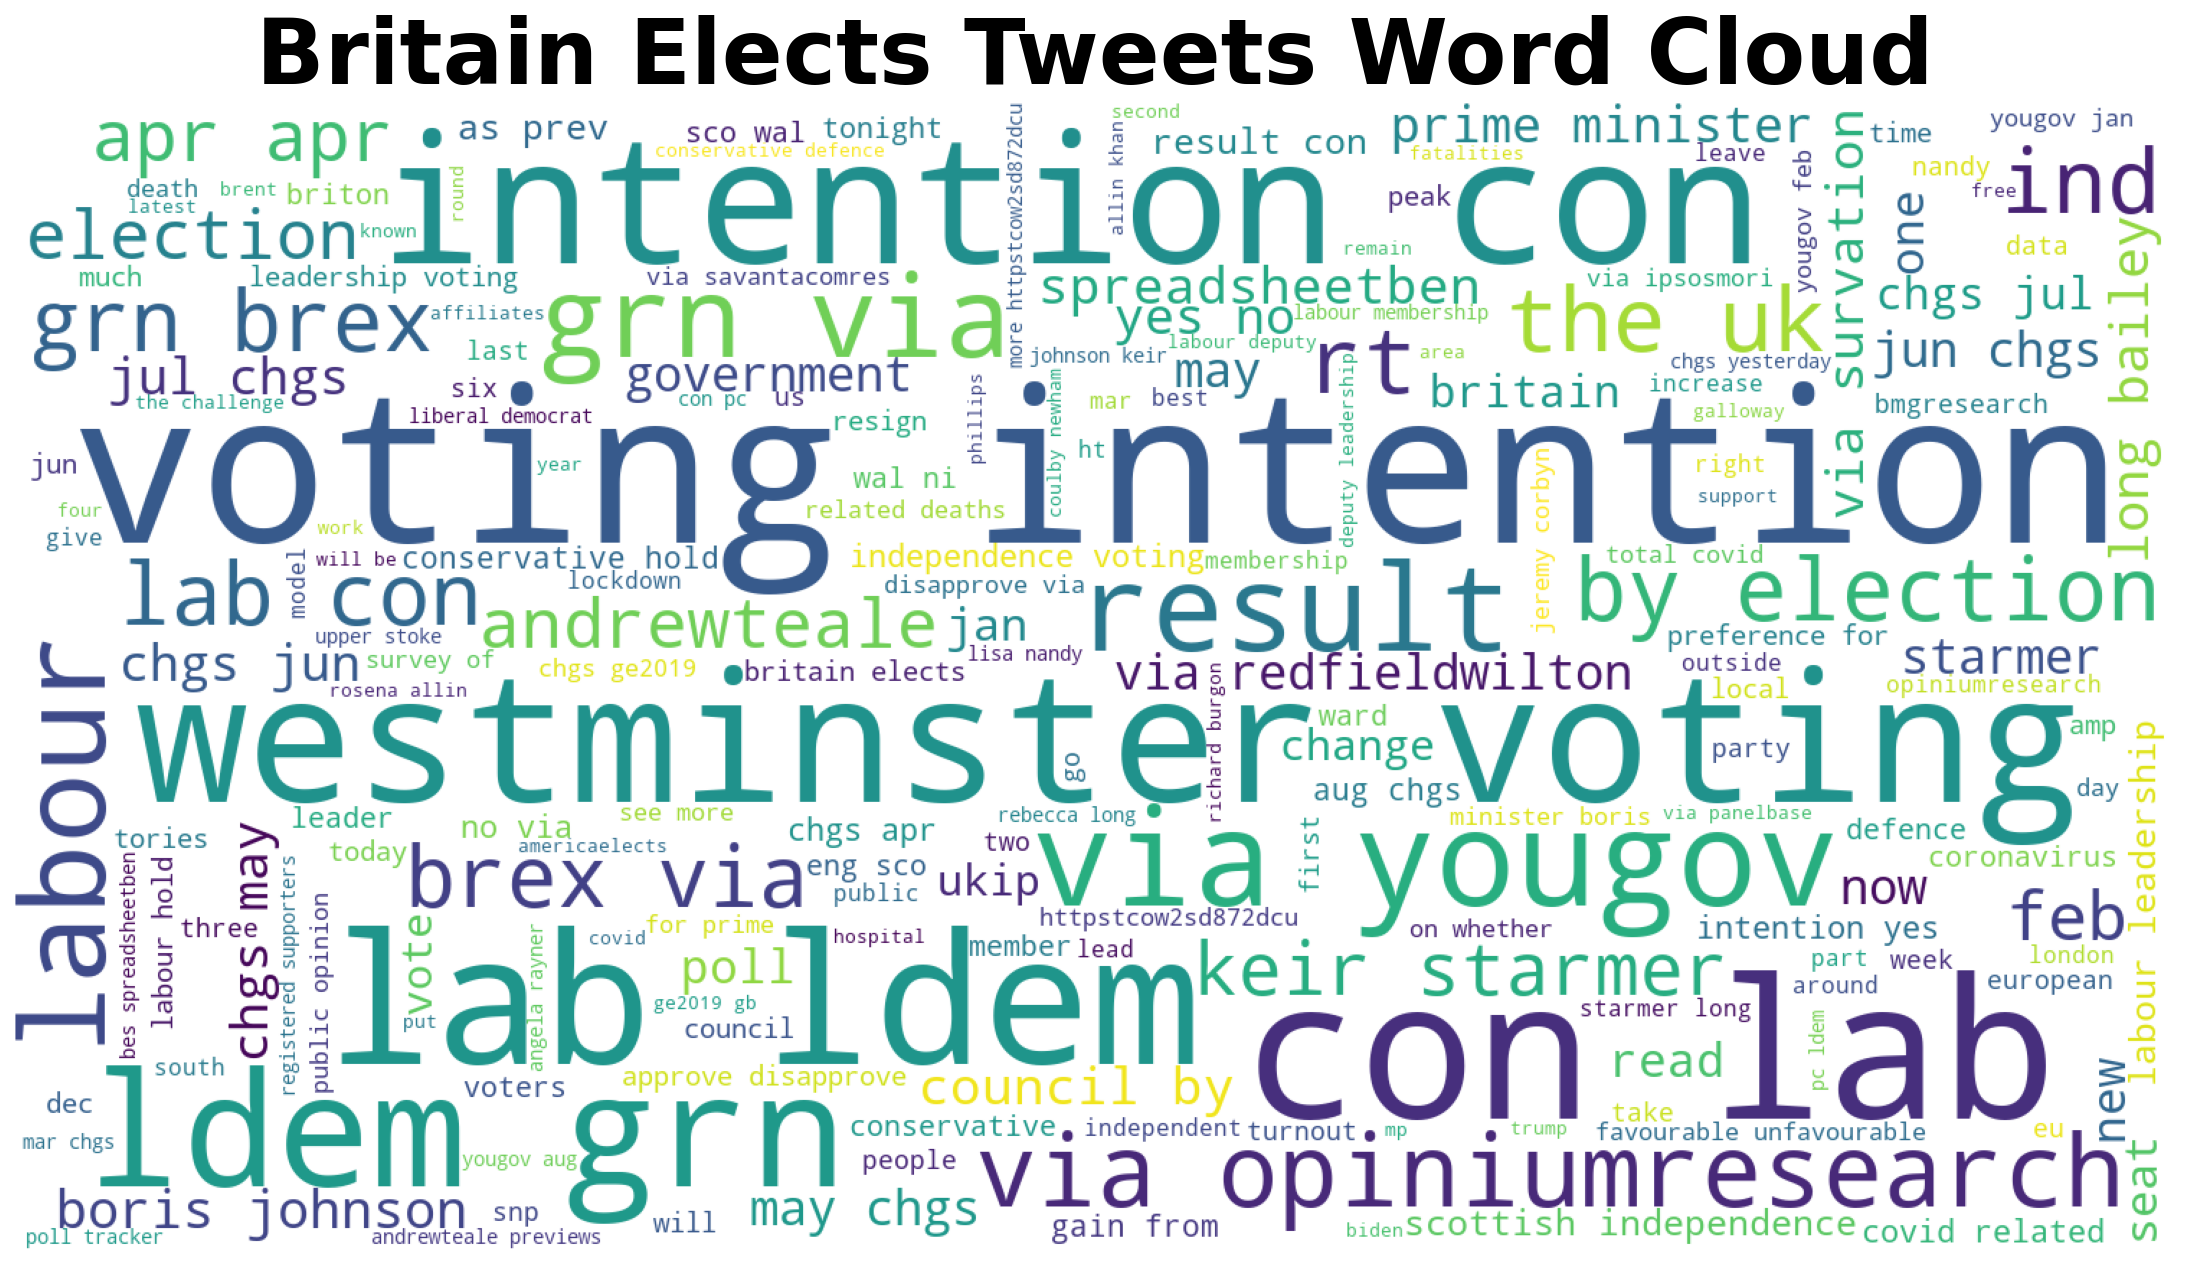

In [4]:
plt.figure(figsize=(15, 8), facecolor=None) 
plt.imshow(wcloud) 
plt.axis("off") 
plt.tight_layout(pad=0) 
plt.title("Britain Elects Tweets Word Cloud", fontweight="bold", fontsize=45);

In [5]:
df = read_data("britain_elects_wvi_data")
df = process_wvi_data(df)

In [6]:
df.tail()

created_at          source      start        end  \
date                                                                   
2020-08-19 2020-08-19 16:29:14          YouGov 2020-08-18 2020-08-19   
2020-08-19 2020-08-20 17:56:37  RedfieldWilton 2020-08-19 2020-08-19   
2020-08-21 2020-08-25 13:09:17       Survation 2020-08-21 2020-08-21   
2020-08-25 2020-08-26 09:36:54          YouGov 2020-08-24 2020-08-25   
2020-08-24 2020-08-27 10:12:30  RedfieldWilton 2020-08-24 2020-08-24   

           change_info  GRN  GRN_change  LAB  LAB_change  LDEM  LDEM_change  \
date                                                                          
2020-08-19      12 Aug  6.0         1.0   38           3   6.0          1.0   
2020-08-19      12 Aug  4.0         1.0   37           1   7.0         -2.0   
2020-08-21         03   4.0        -1.0   37           2   9.0          1.0   
2020-08-25      18 Aug  4.0        -2.0   36          -2   6.0          0.0   
2020-08-24      19 Aug  5.0         1.0   37           0   9.0          2.0   

            SNP  SNP_change   CON  CON_change  BREX  BREX_change  UKIP  \
date                                                                     
2020-08-19  NaN         NaN  40.0        -4.0   4.0          1.0   NaN   
2020-08-19  NaN         NaN  44.0         1.0   NaN          NaN   NaN   
2020-08-21  NaN         NaN  41.0        -3.0   1.0          1.0   NaN   
2020-08-25  NaN         NaN  43.0         3.0   3.0         -1.0   NaN   
2020-08-24  NaN         NaN  42.0        -2.0   NaN          NaN   NaN   

            UKIP_change collection_source  
date                                       
2020-08-19          NaN     britainelects  
2020-08-19          NaN     britainelects  
2020-08-21          NaN     britainelects  
2020-08-25          NaN     britainelects  
2020-08-24          NaN     britainelects

In [7]:
histo = read_historical_polling_report()
histo.head()

source        end  CON  LAB  LDEM  UKIP  GRN  \
date                                                                
2019-12-11      DeltapollUK 2019-12-11   45   35    10   NaN  3.0   
2019-12-11     KantarPublic 2019-12-11   44   32    13   NaN  3.0   
2019-12-11      BMGResearch 2019-12-11   41   32    14   NaN  3.0   
2019-12-11  OpiniumResearch 2019-12-11   45   33    12   NaN  2.0   
2019-12-11        Panelbase 2019-12-11   43   34    11   NaN  3.0   

           collection_source  
date                          
2019-12-11            uk_prh  
2019-12-11            uk_prh  
2019-12-11            uk_prh  
2019-12-11            uk_prh  
2019-12-11            uk_prh

In [8]:
df = pd.concat([histo, df]).sort_index()
df

source        end   CON  LAB  LDEM  UKIP  GRN  \
date                                                                 
2010-05-13              ICM 2010-05-13  38.0   33  21.0   NaN  NaN   
2010-05-13           ComRes 2010-05-13  38.0   34  21.0   NaN  NaN   
2010-05-14           YouGov 2010-05-14  37.0   34  21.0   NaN  NaN   
2010-05-21           YouGov 2010-05-21  39.0   32  21.0   NaN  NaN   
2010-05-21  OpiniumResearch 2010-05-21  38.0   29  21.0   NaN  NaN   
...                     ...        ...   ...  ...   ...   ...  ...   
2020-08-19           YouGov 2020-08-19  40.0   38   6.0   NaN  6.0   
2020-08-19   RedfieldWilton 2020-08-19  44.0   37   7.0   NaN  4.0   
2020-08-21        Survation 2020-08-21  41.0   37   9.0   NaN  4.0   
2020-08-24   RedfieldWilton 2020-08-24  42.0   37   9.0   NaN  5.0   
2020-08-25           YouGov 2020-08-25  43.0   36   6.0   NaN  4.0   

           collection_source          created_at      start change_info  \
date                                                                      
2010-05-13            uk_prh                 NaT        NaT         NaN   
2010-05-13            uk_prh                 NaT        NaT         NaN   
2010-05-14            uk_prh                 NaT        NaT         NaN   
2010-05-21            uk_prh                 NaT        NaT         NaN   
2010-05-21            uk_prh                 NaT        NaT         NaN   
...                      ...                 ...        ...         ...   
2020-08-19     britainelects 2020-08-19 16:29:14 2020-08-18      12 Aug   
2020-08-19     britainelects 2020-08-20 17:56:37 2020-08-19      12 Aug   
2020-08-21     britainelects 2020-08-25 13:09:17 2020-08-21         03    
2020-08-24     britainelects 2020-08-27 10:12:30 2020-08-24      19 Aug   
2020-08-25     britainelects 2020-08-26 09:36:54 2020-08-24      18 Aug   

            GRN_change  LAB_change  LDEM_change  SNP  SNP_change  CON_change  \
date                                                                           
2010-05-13         NaN         NaN          NaN  NaN         NaN         NaN   
2010-05-13         NaN         NaN          NaN  NaN         NaN         NaN   
2010-05-14         NaN         NaN          NaN  NaN         NaN         NaN   
2010-05-21         NaN         NaN          NaN  NaN         NaN         NaN   
2010-05-21         NaN         NaN          NaN  NaN         NaN         NaN   
...                ...         ...          ...  ...         ...         ...   
2020-08-19         1.0         3.0          1.0  NaN         NaN        -4.0   
2020-08-19         1.0         1.0         -2.0  NaN         NaN         1.0   
2020-08-21        -1.0         2.0          1.0  NaN         NaN        -3.0   
2020-08-24         1.0         0.0          2.0  NaN         NaN        -2.0   
2020-08-25        -2.0        -2.0          0.0  NaN         NaN         3.0   

            BREX  BREX_change  UKIP_change  
date                                        
2010-05-13   NaN          NaN          NaN  
2010-05-13   NaN          NaN          NaN  
2010-05-14   NaN          NaN          NaN  
2010-05-21   NaN          NaN          NaN  
2010-05-21   NaN          NaN          NaN  
...          ...          ...          ...  
2020-08-19   4.0          1.0          NaN  
2020-08-19   NaN          NaN          NaN  
2020-08-21   1.0          1.0          NaN  
2020-08-24   NaN          NaN          NaN  
2020-08-25   3.0         -1.0          NaN  

[2767 rows x 20 columns]

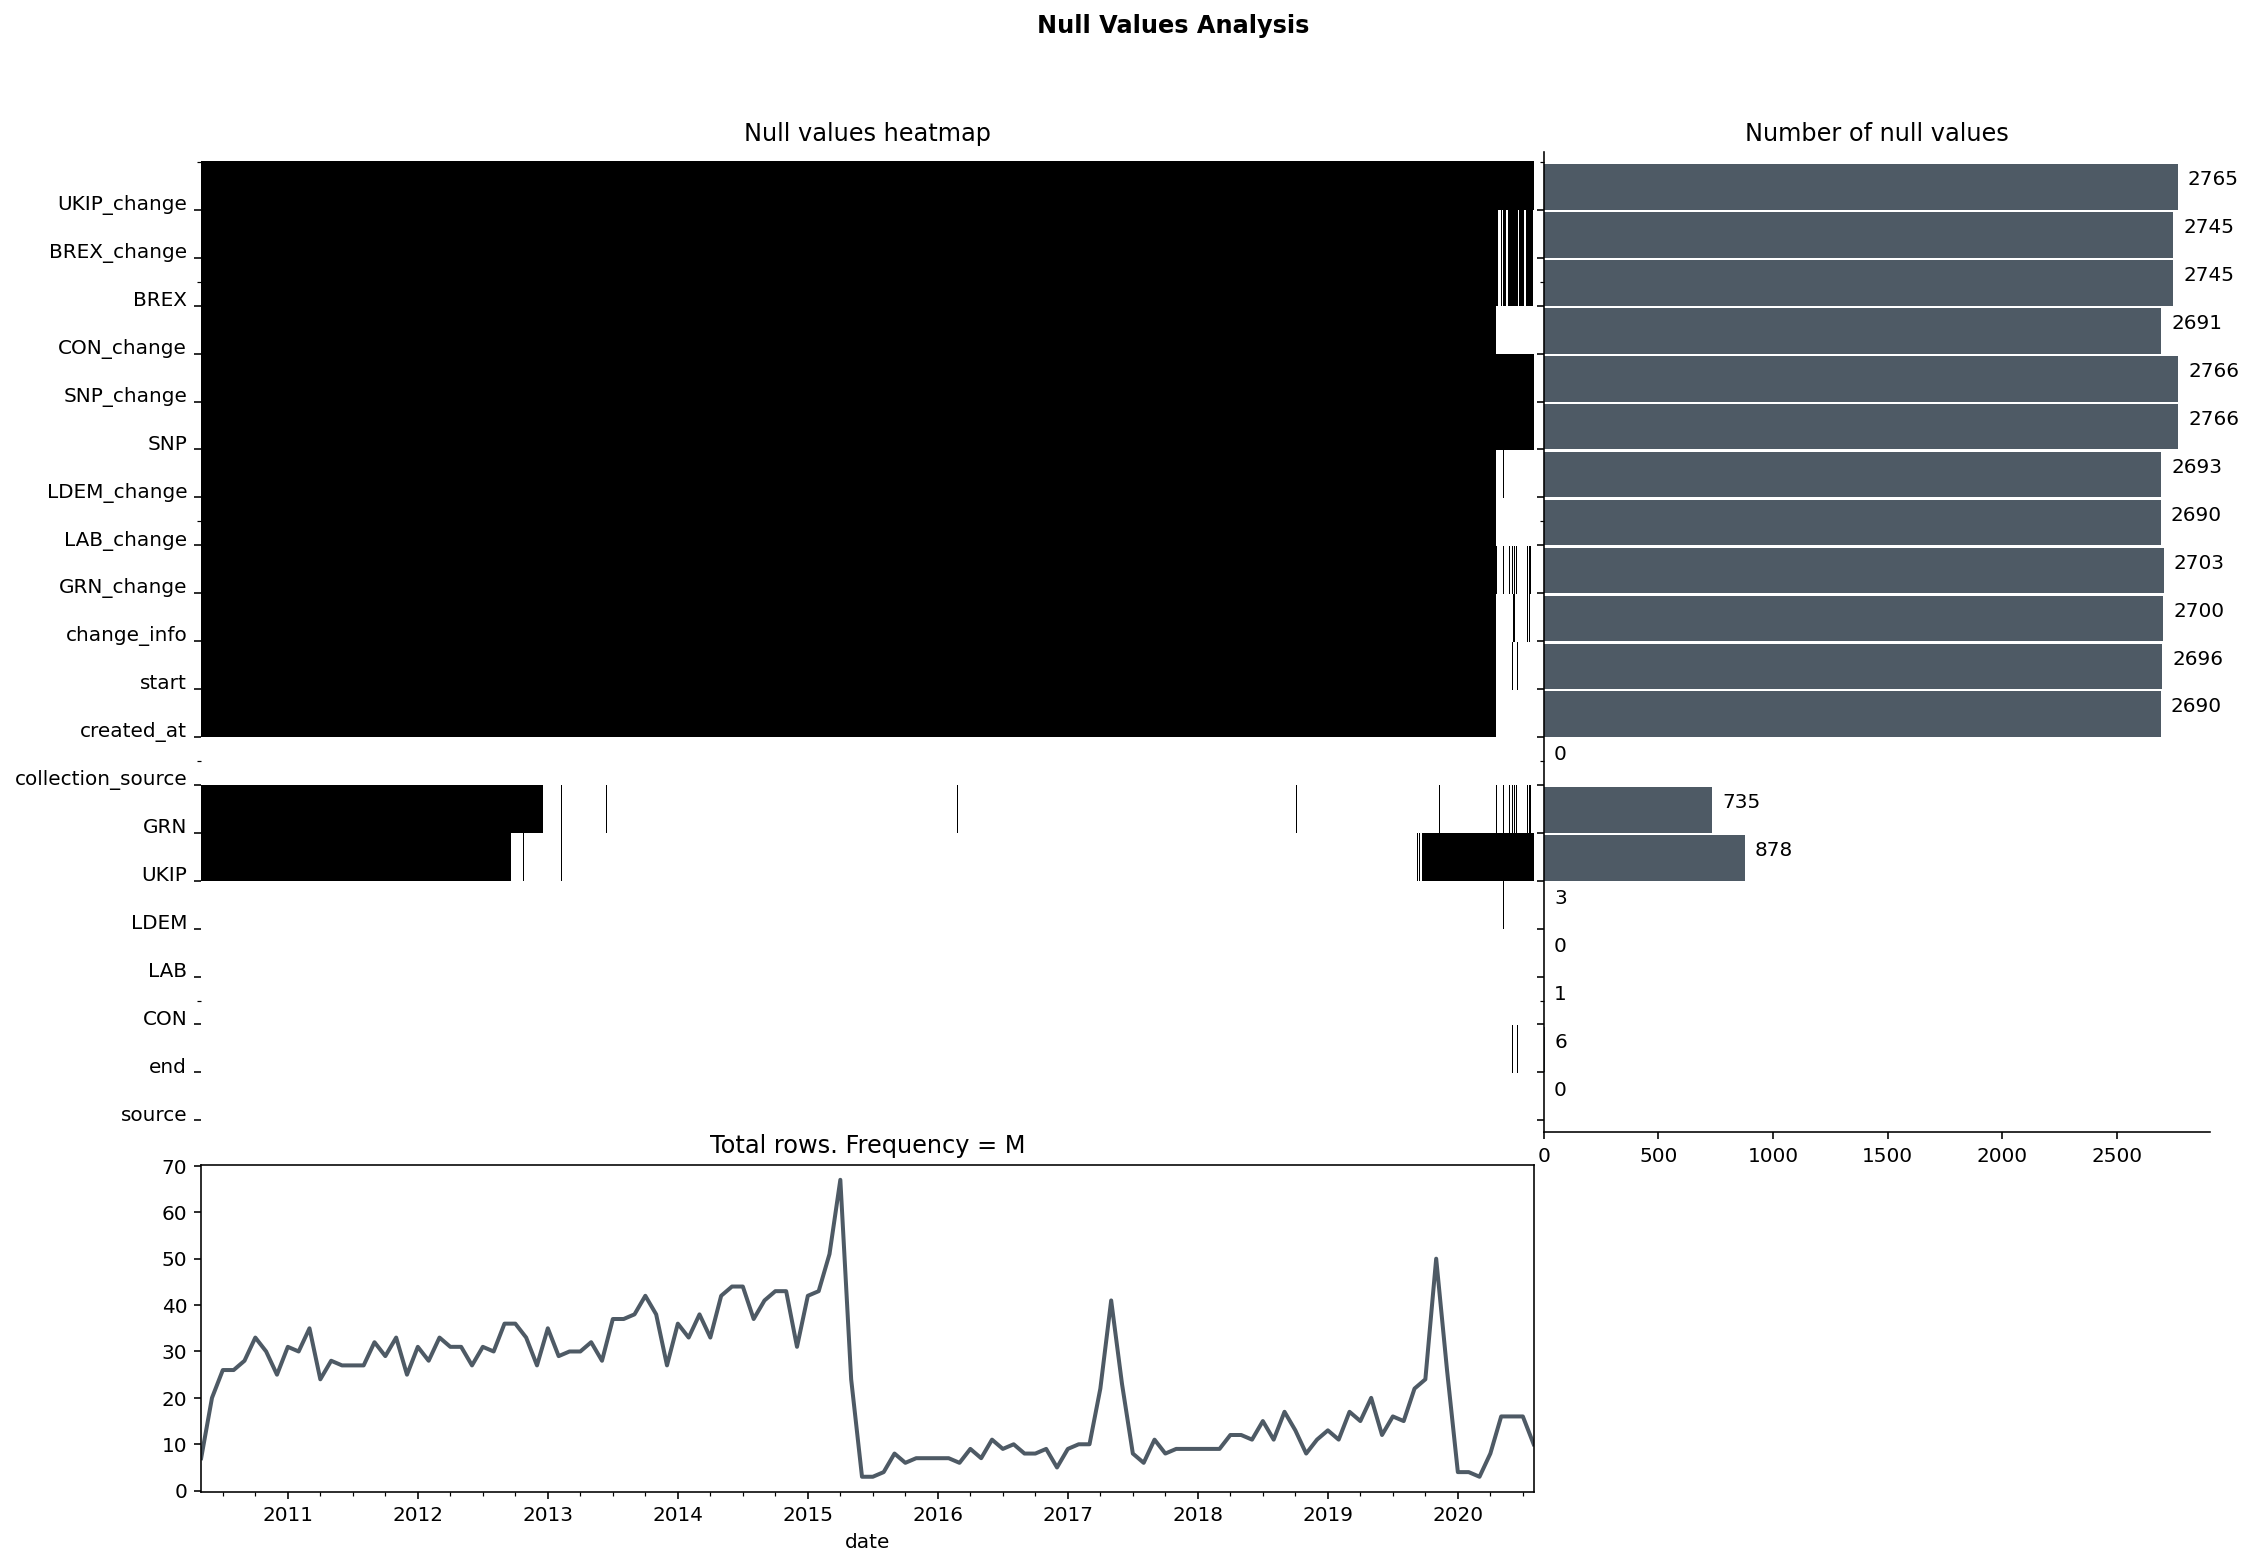

In [9]:
null_values_plot(df)

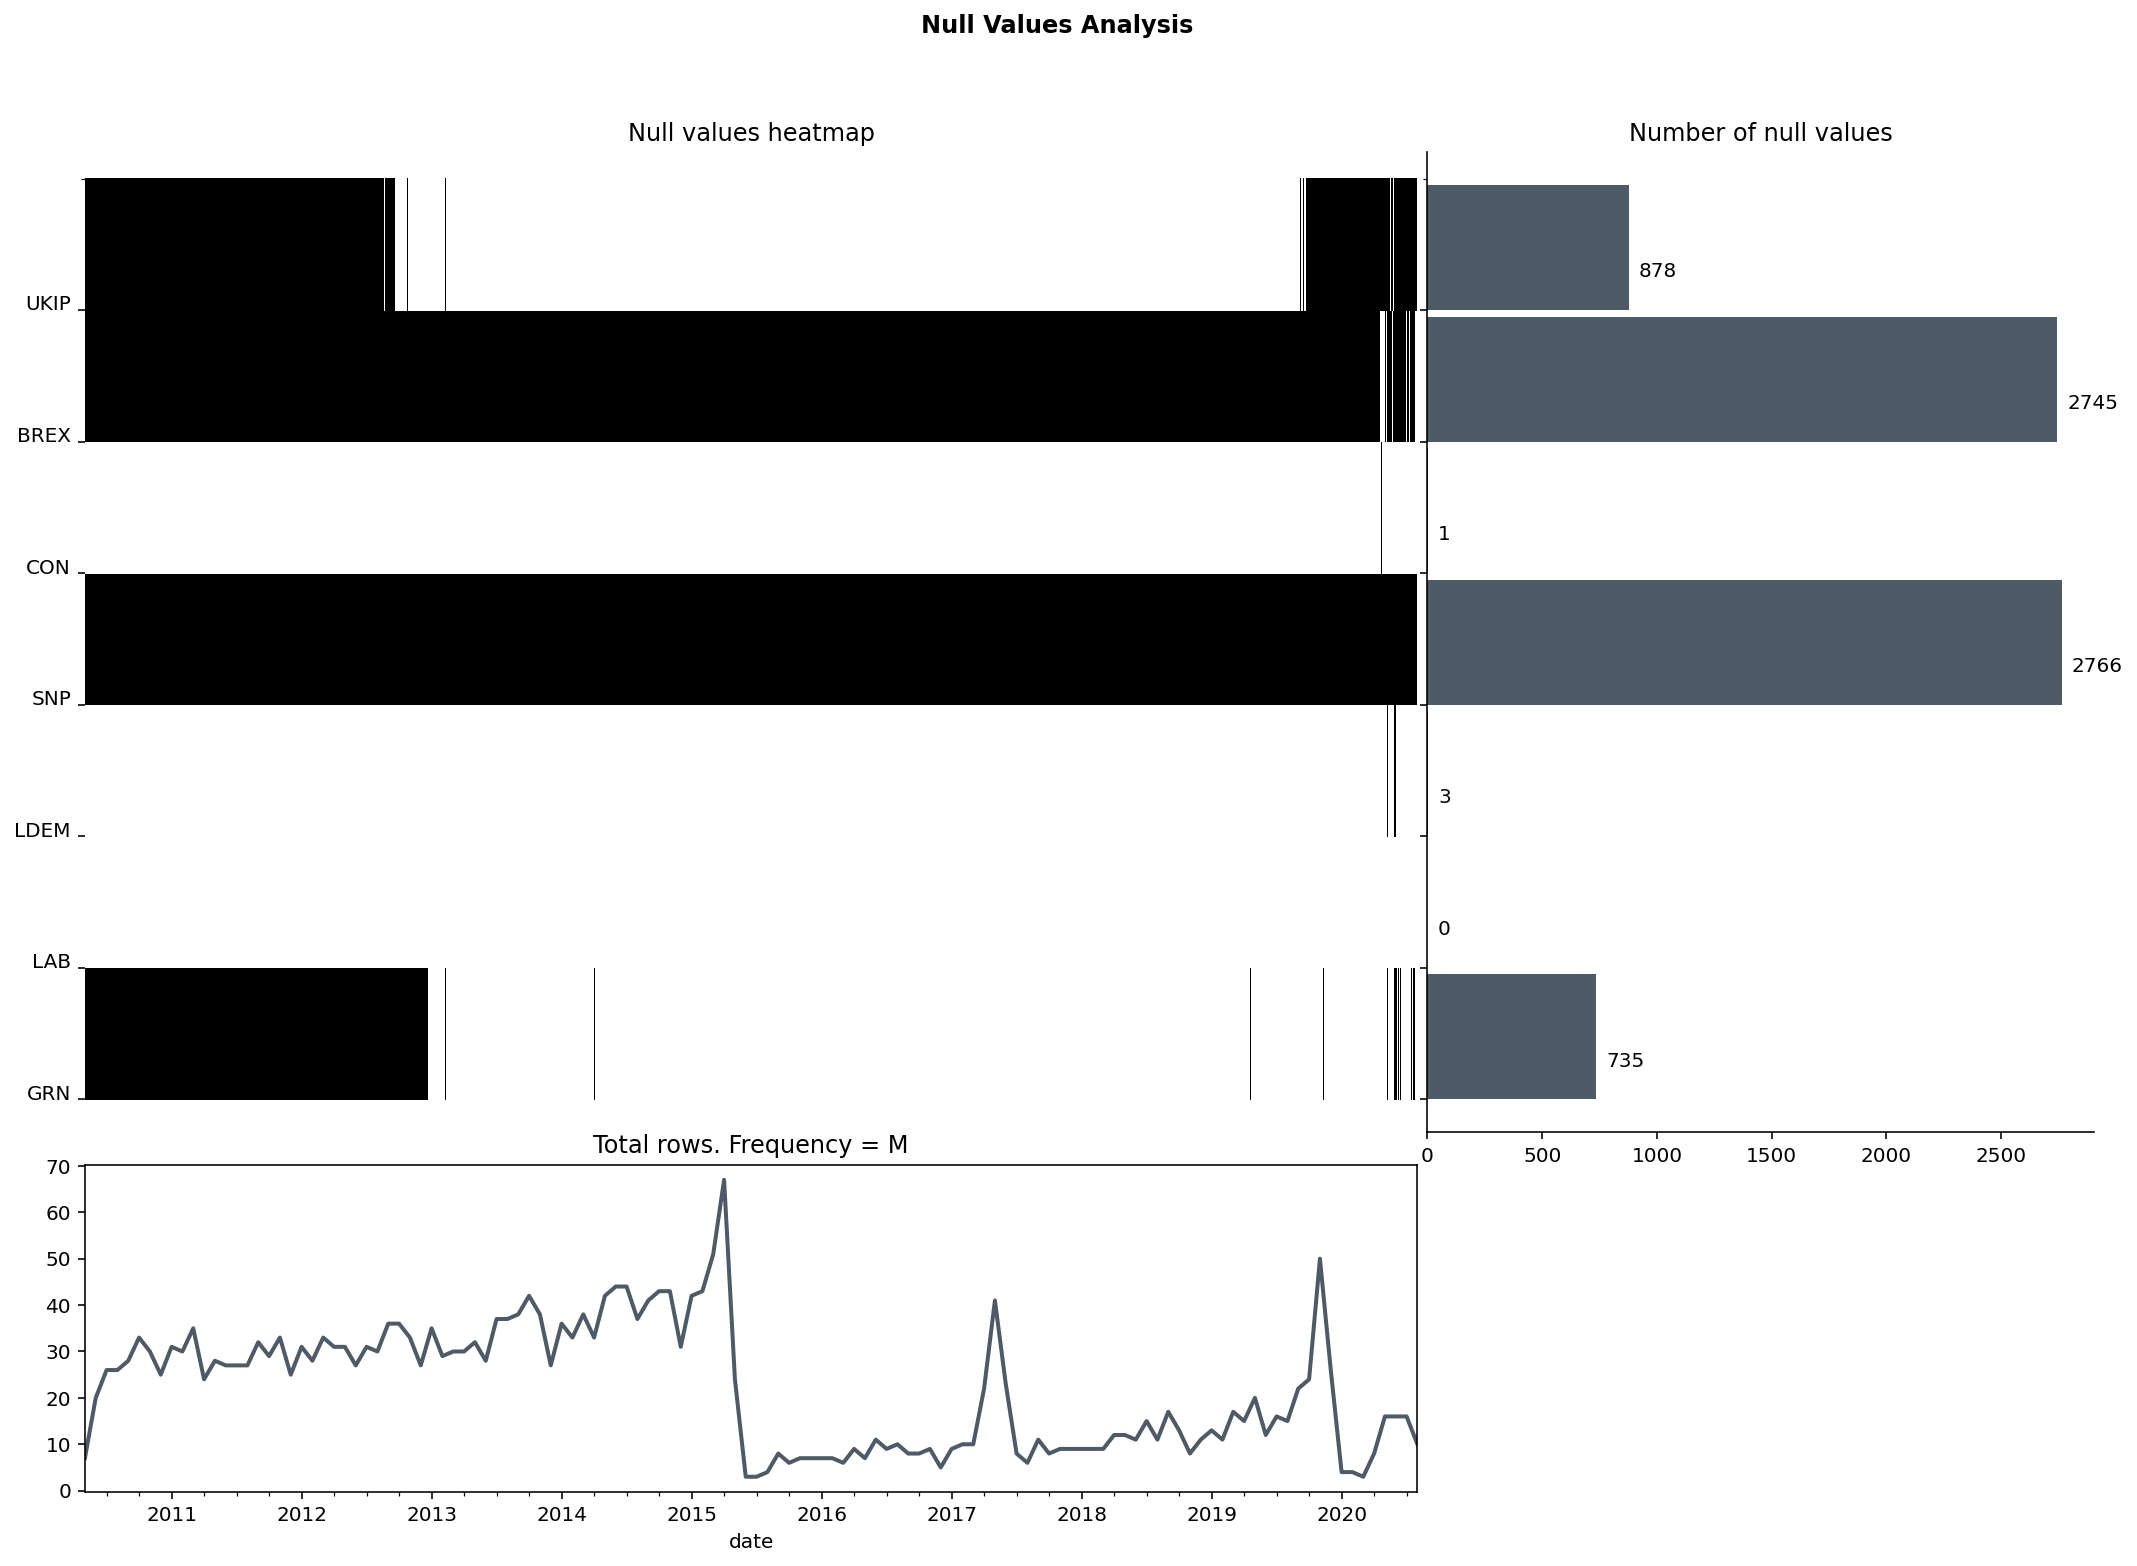

In [10]:
null_values_plot(df[list(parties)])

In [11]:
plt.style.use("fivethirtyeight")

(<Figure size 1440x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3271564460>)

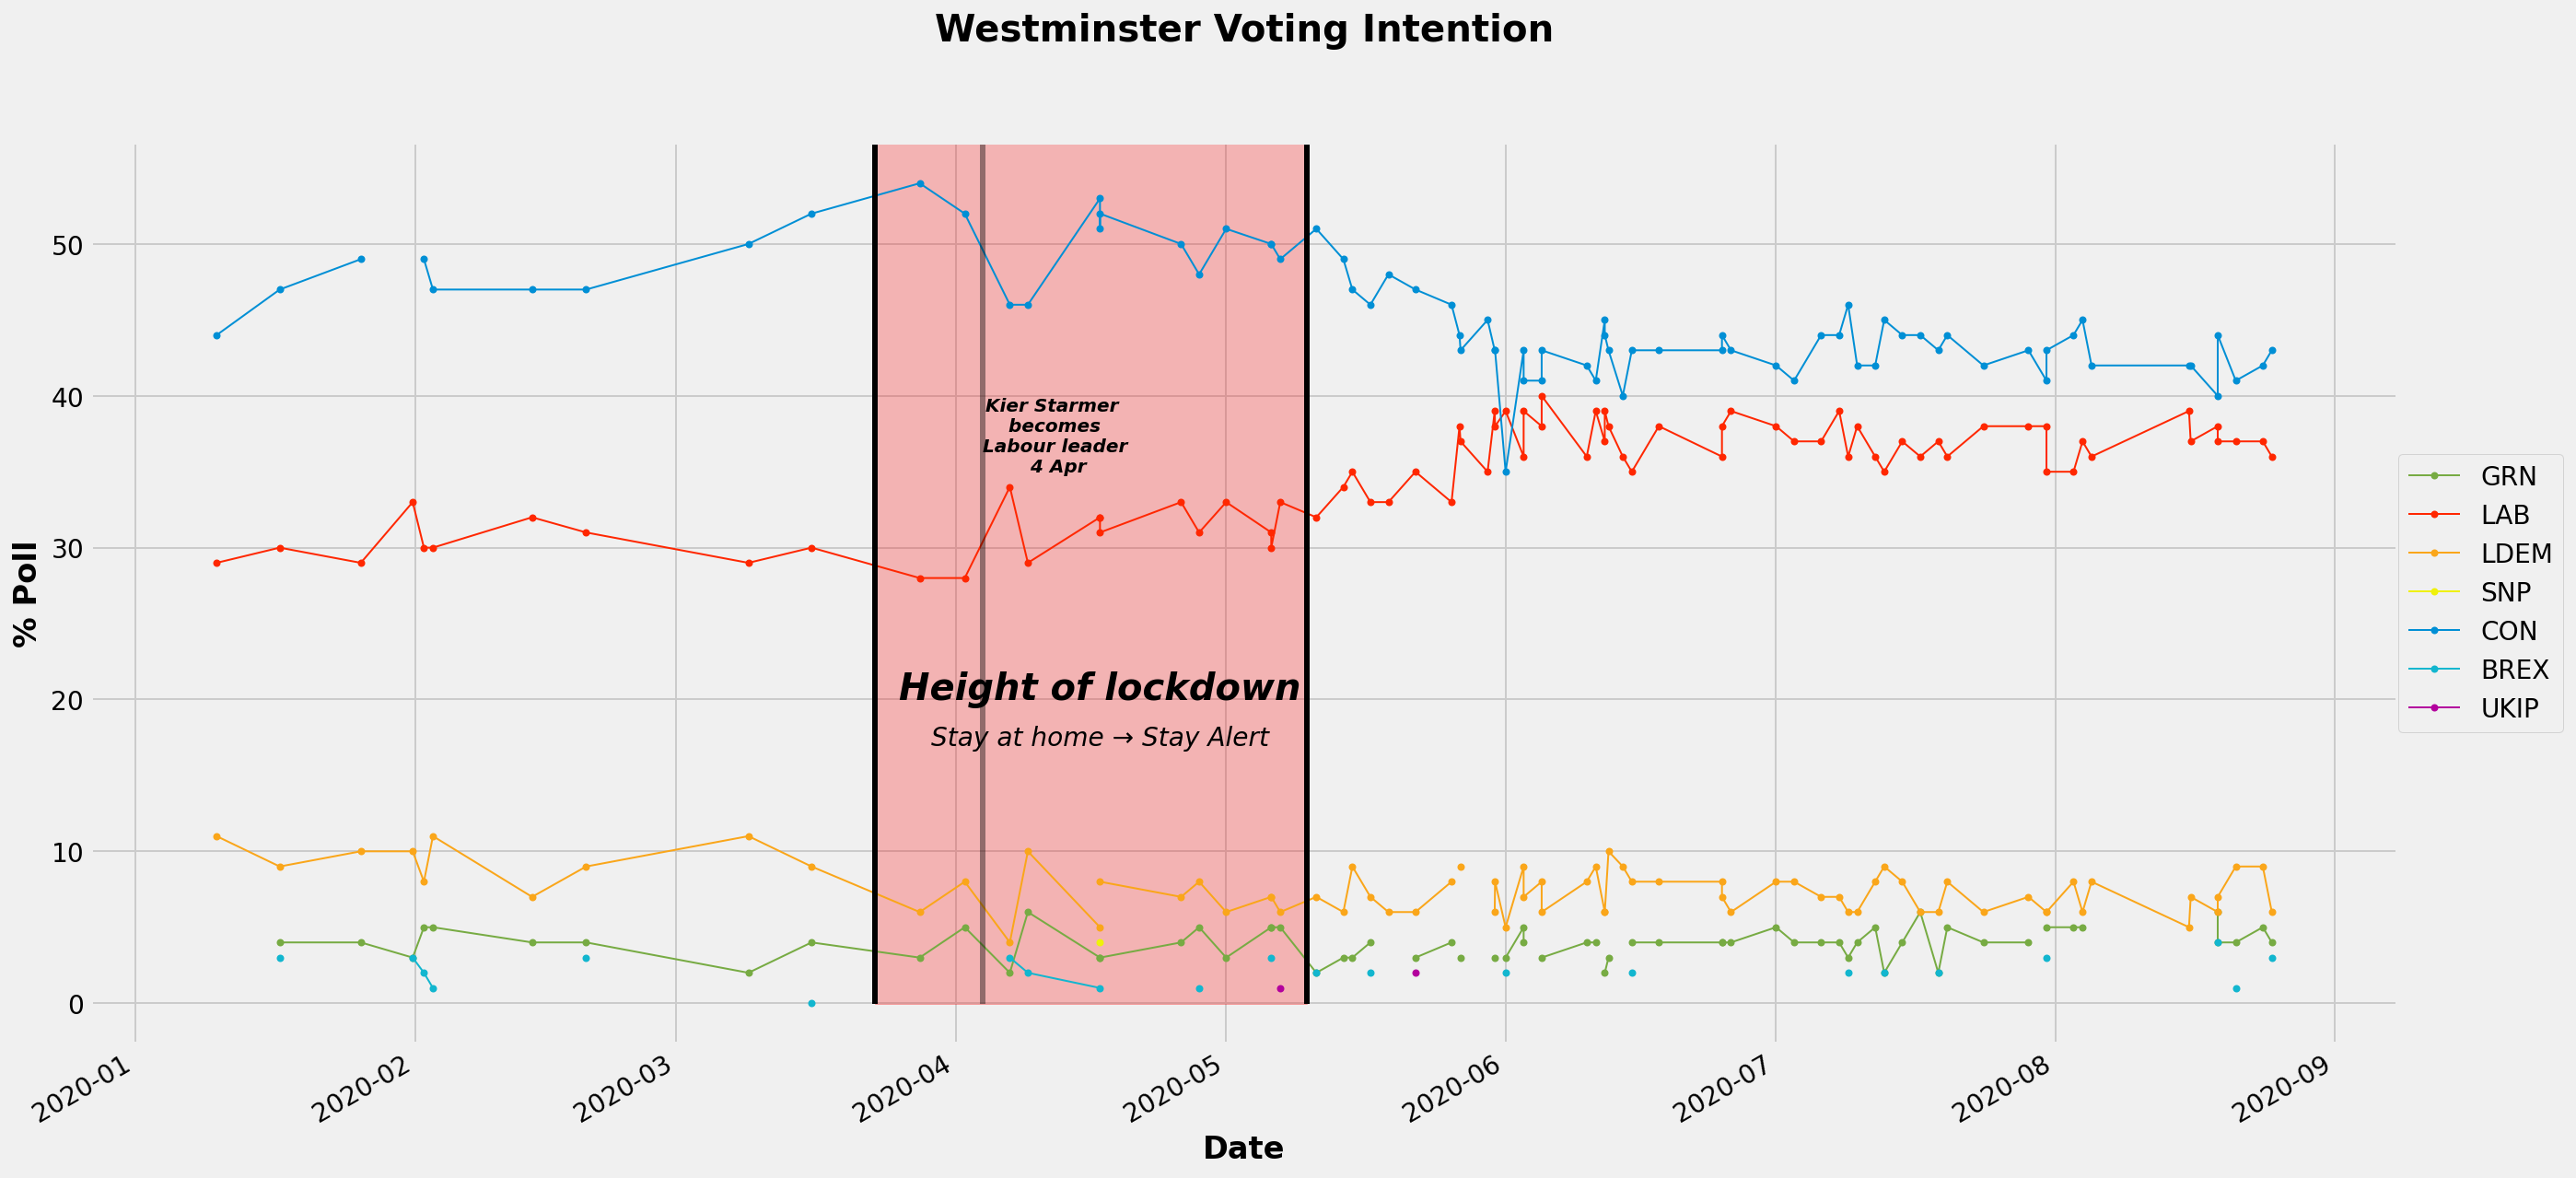

In [12]:
plot_vote_intention(df[df["collection_source"] == "britainelects"], add_lockdown_context=True)

(<Figure size 1440x1080 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f327159dc40>)

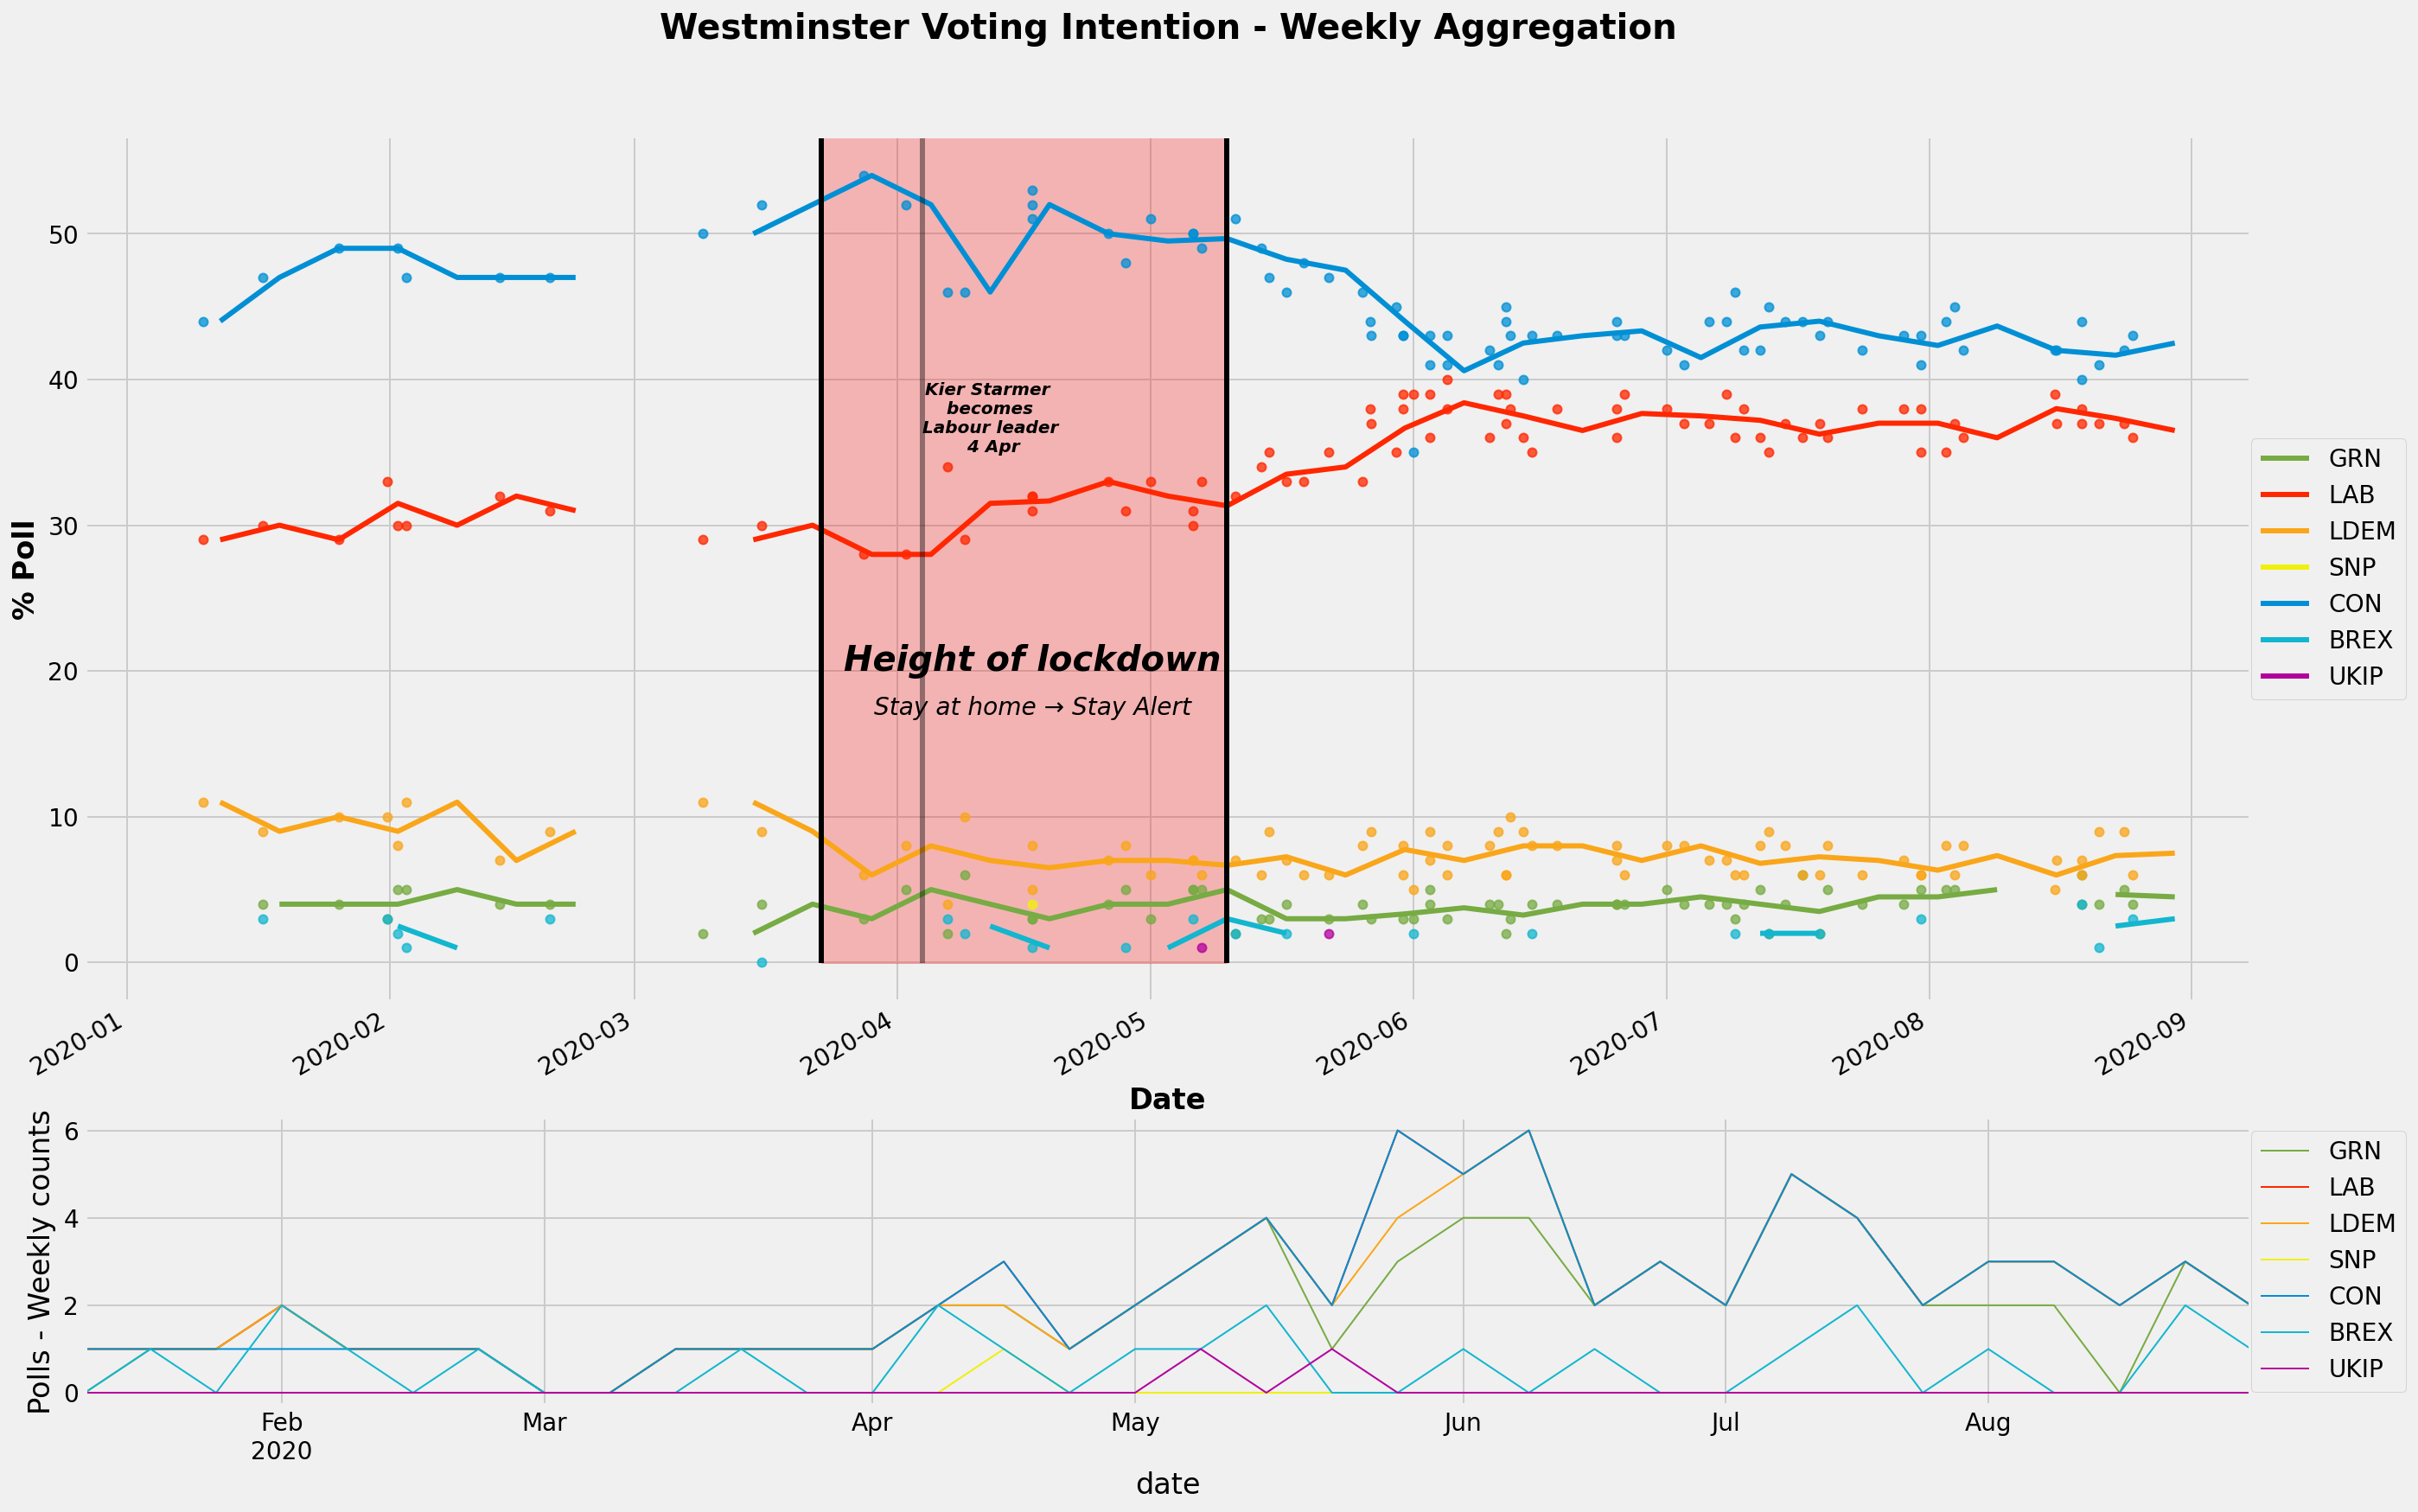

In [13]:
plot_vote_intention(df[df["collection_source"] == "britainelects"], agg="W", add_lockdown_context=True, markersize=5)

(<Figure size 1440x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3271801c40>)

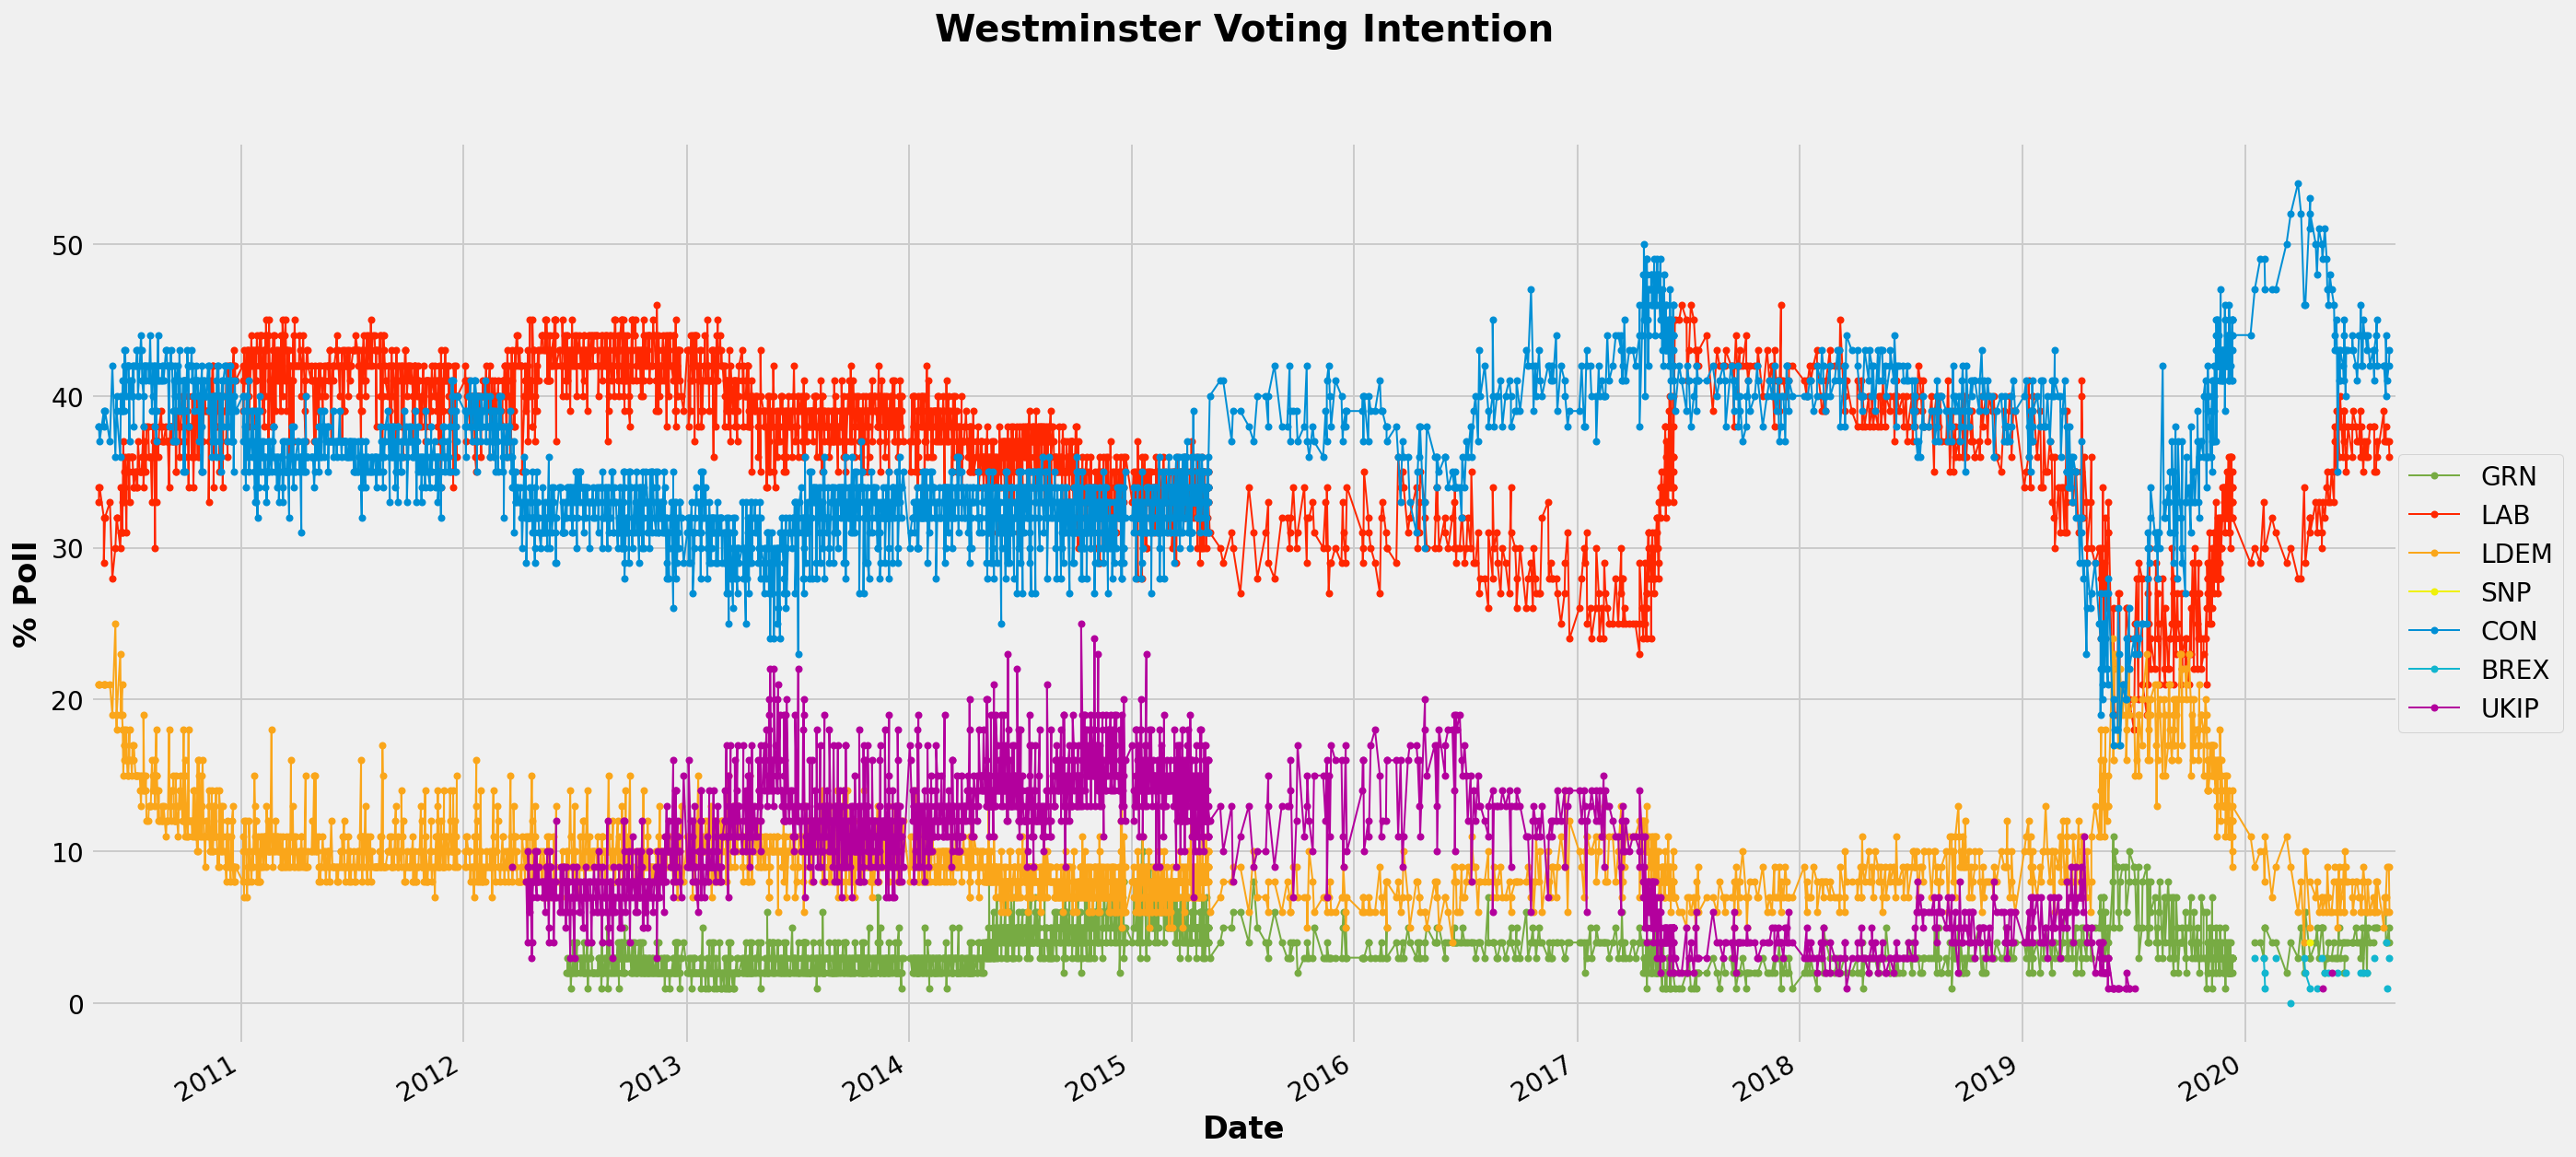

In [14]:
plot_vote_intention(df)

(<Figure size 1440x1080 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3271629bb0>)

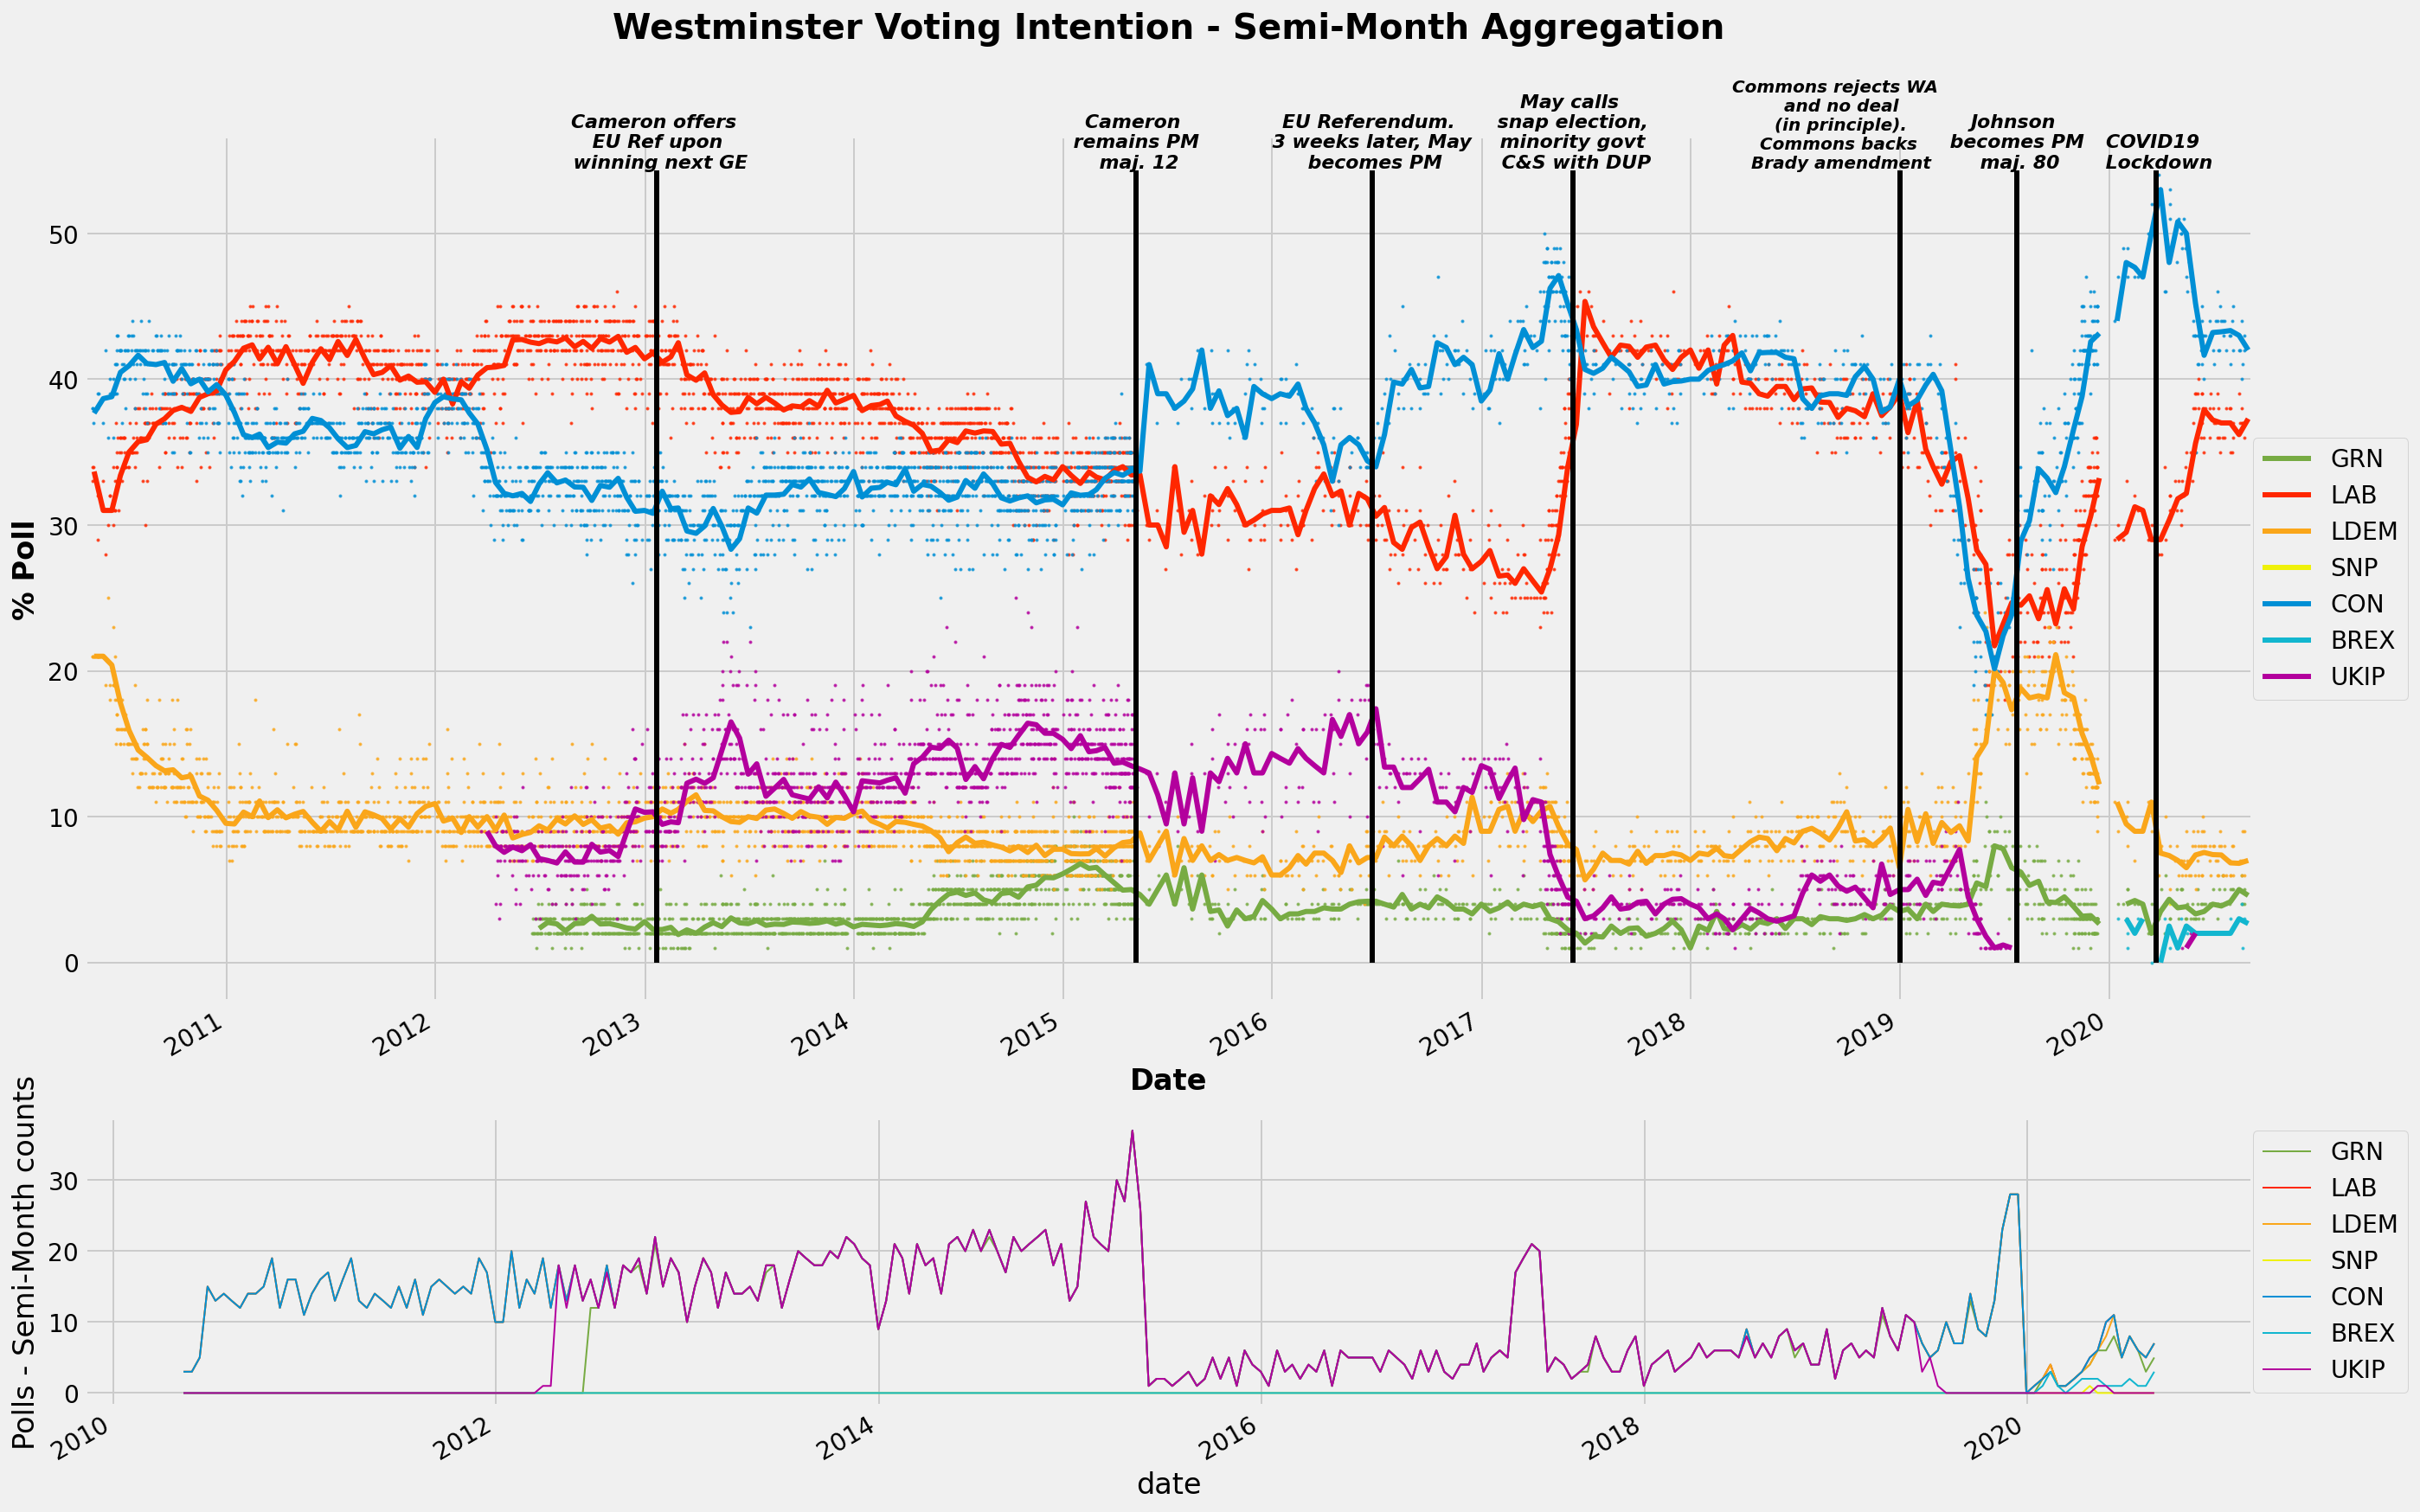

In [15]:
plot_vote_intention(df, agg='SM', add_lifetime_context=True)

(<Figure size 1440x1080 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f32702567f0>)

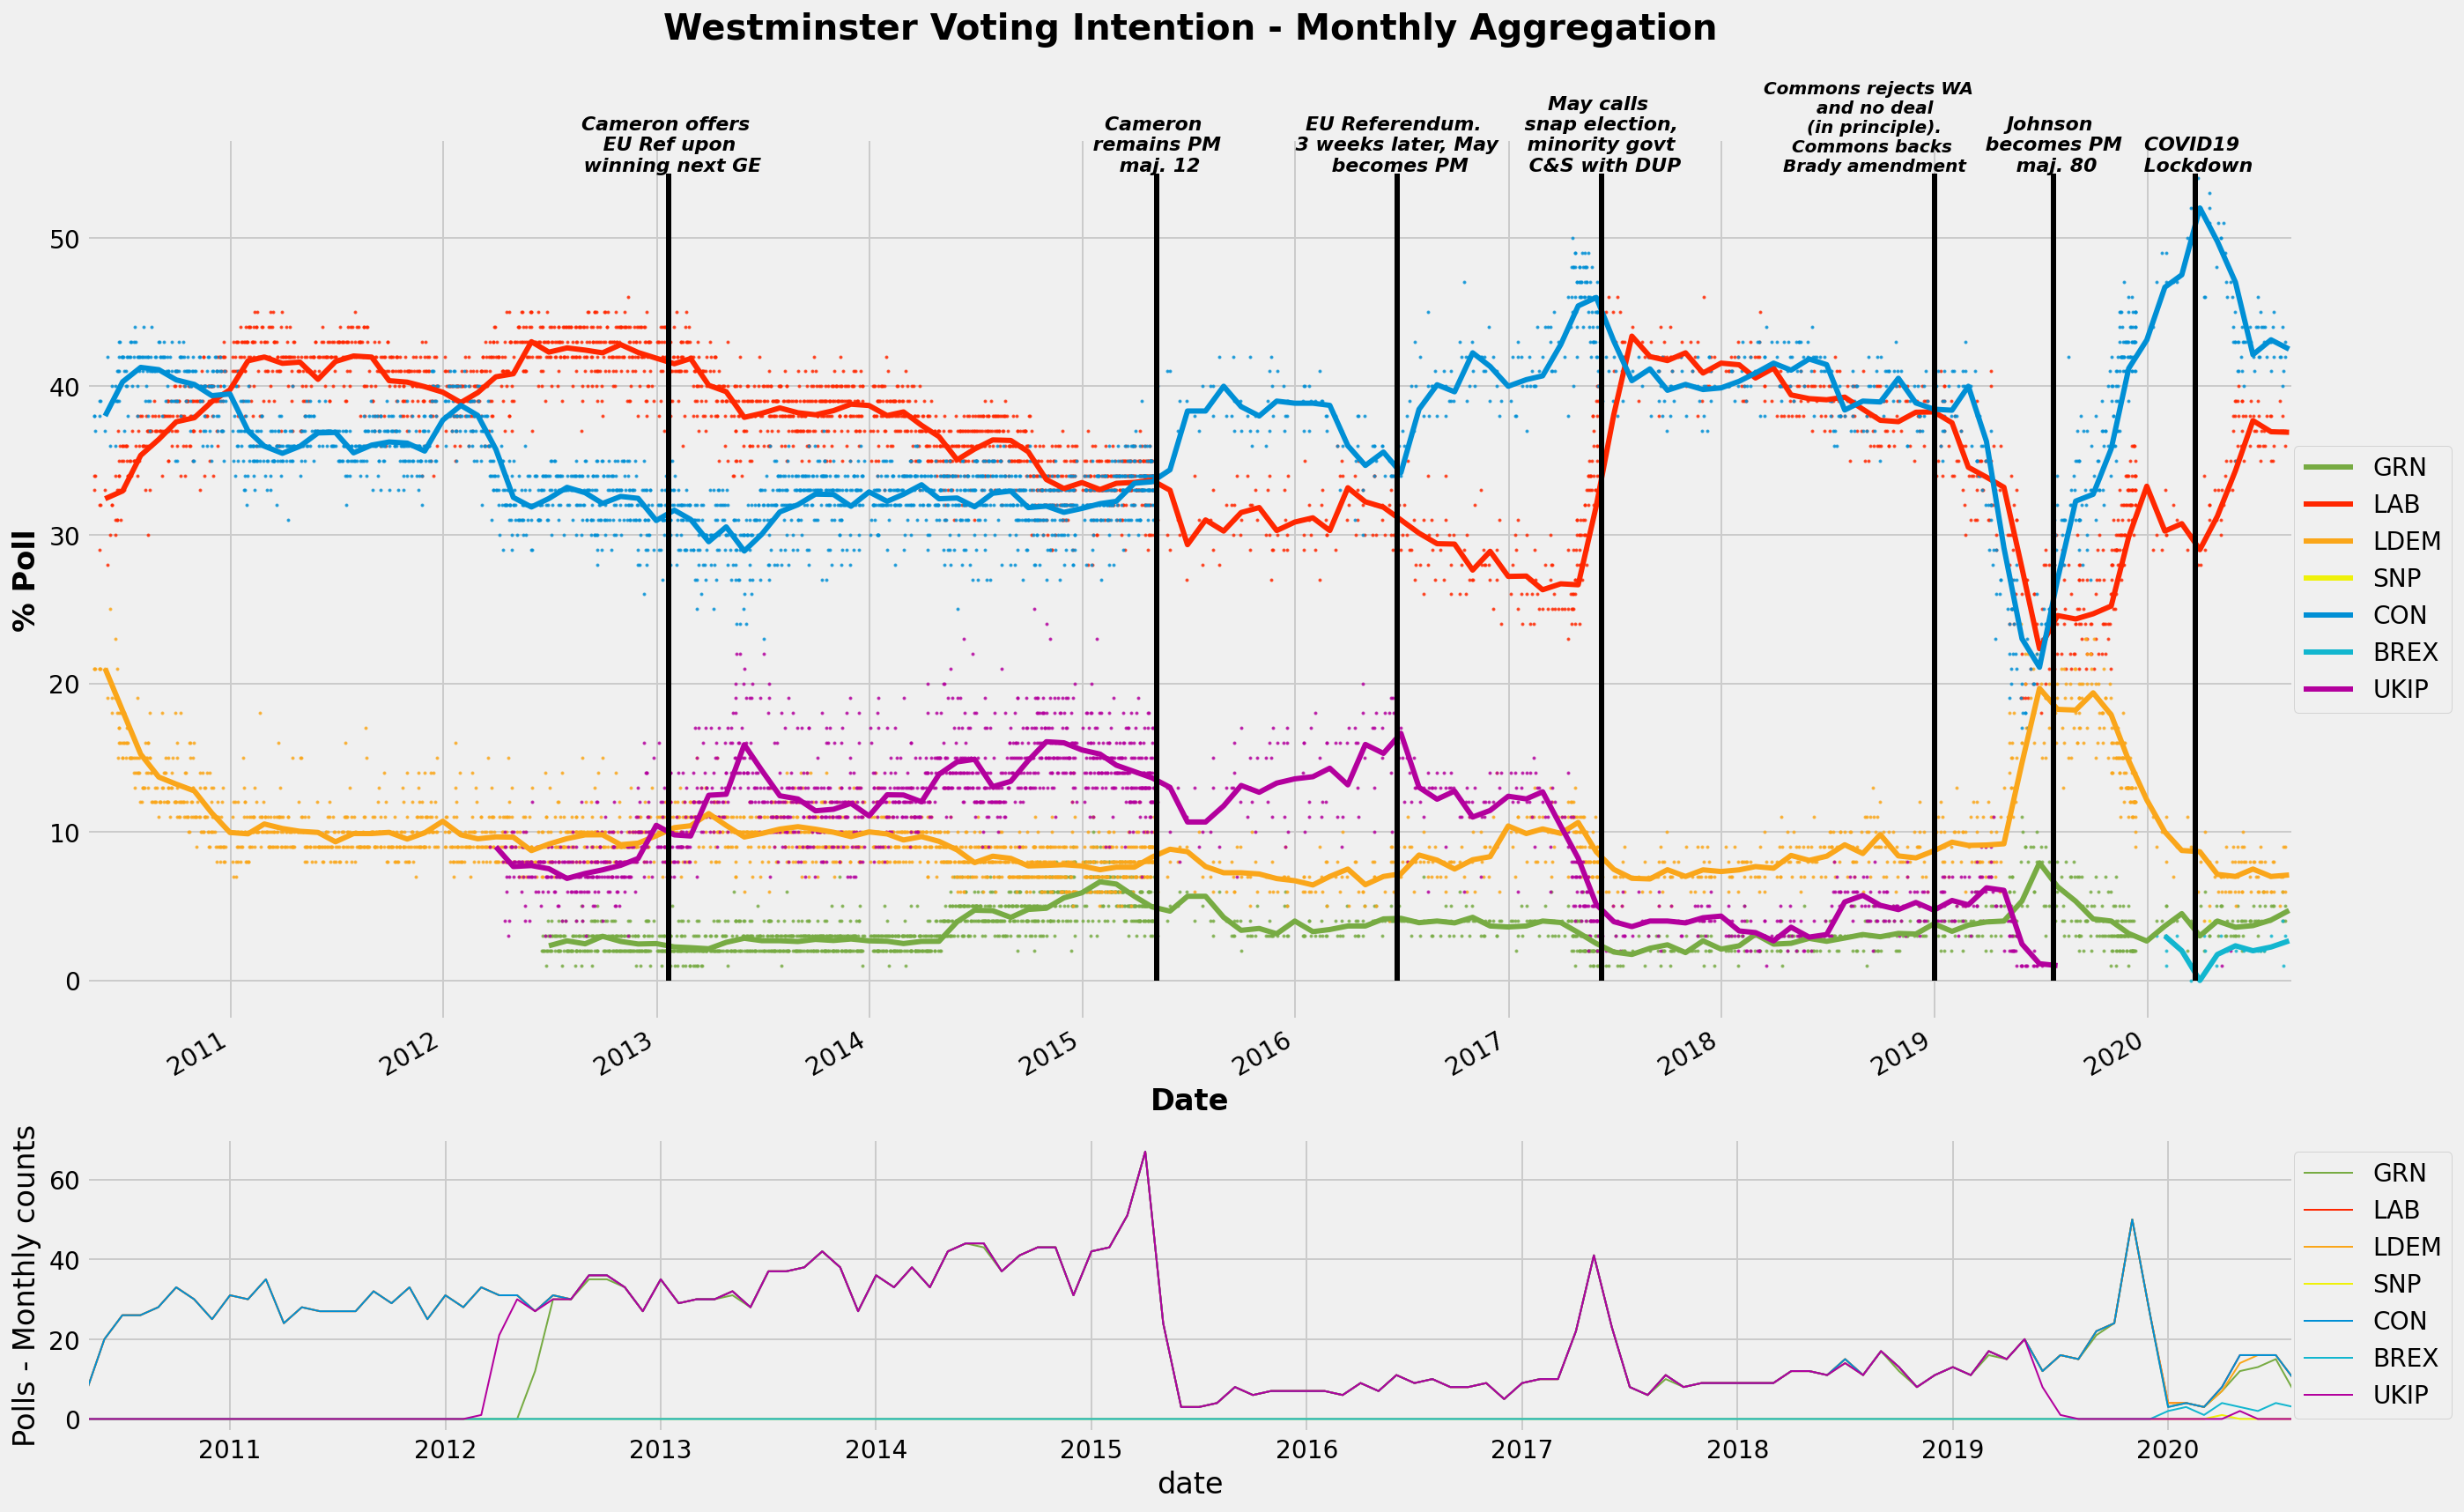

In [16]:
plot_vote_intention(df, agg='M', add_lifetime_context=True)

In [17]:
df[list(parties)].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2767 entries, 2010-05-13 00:00:00 to 2020-08-25 00:00:00
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GRN     2032 non-null   float64
 1   LAB     2767 non-null   int64  
 2   LDEM    2764 non-null   float64
 3   SNP     1 non-null      float64
 4   CON     2766 non-null   float64
 5   BREX    22 non-null     float64
 6   UKIP    1889 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 172.9 KB


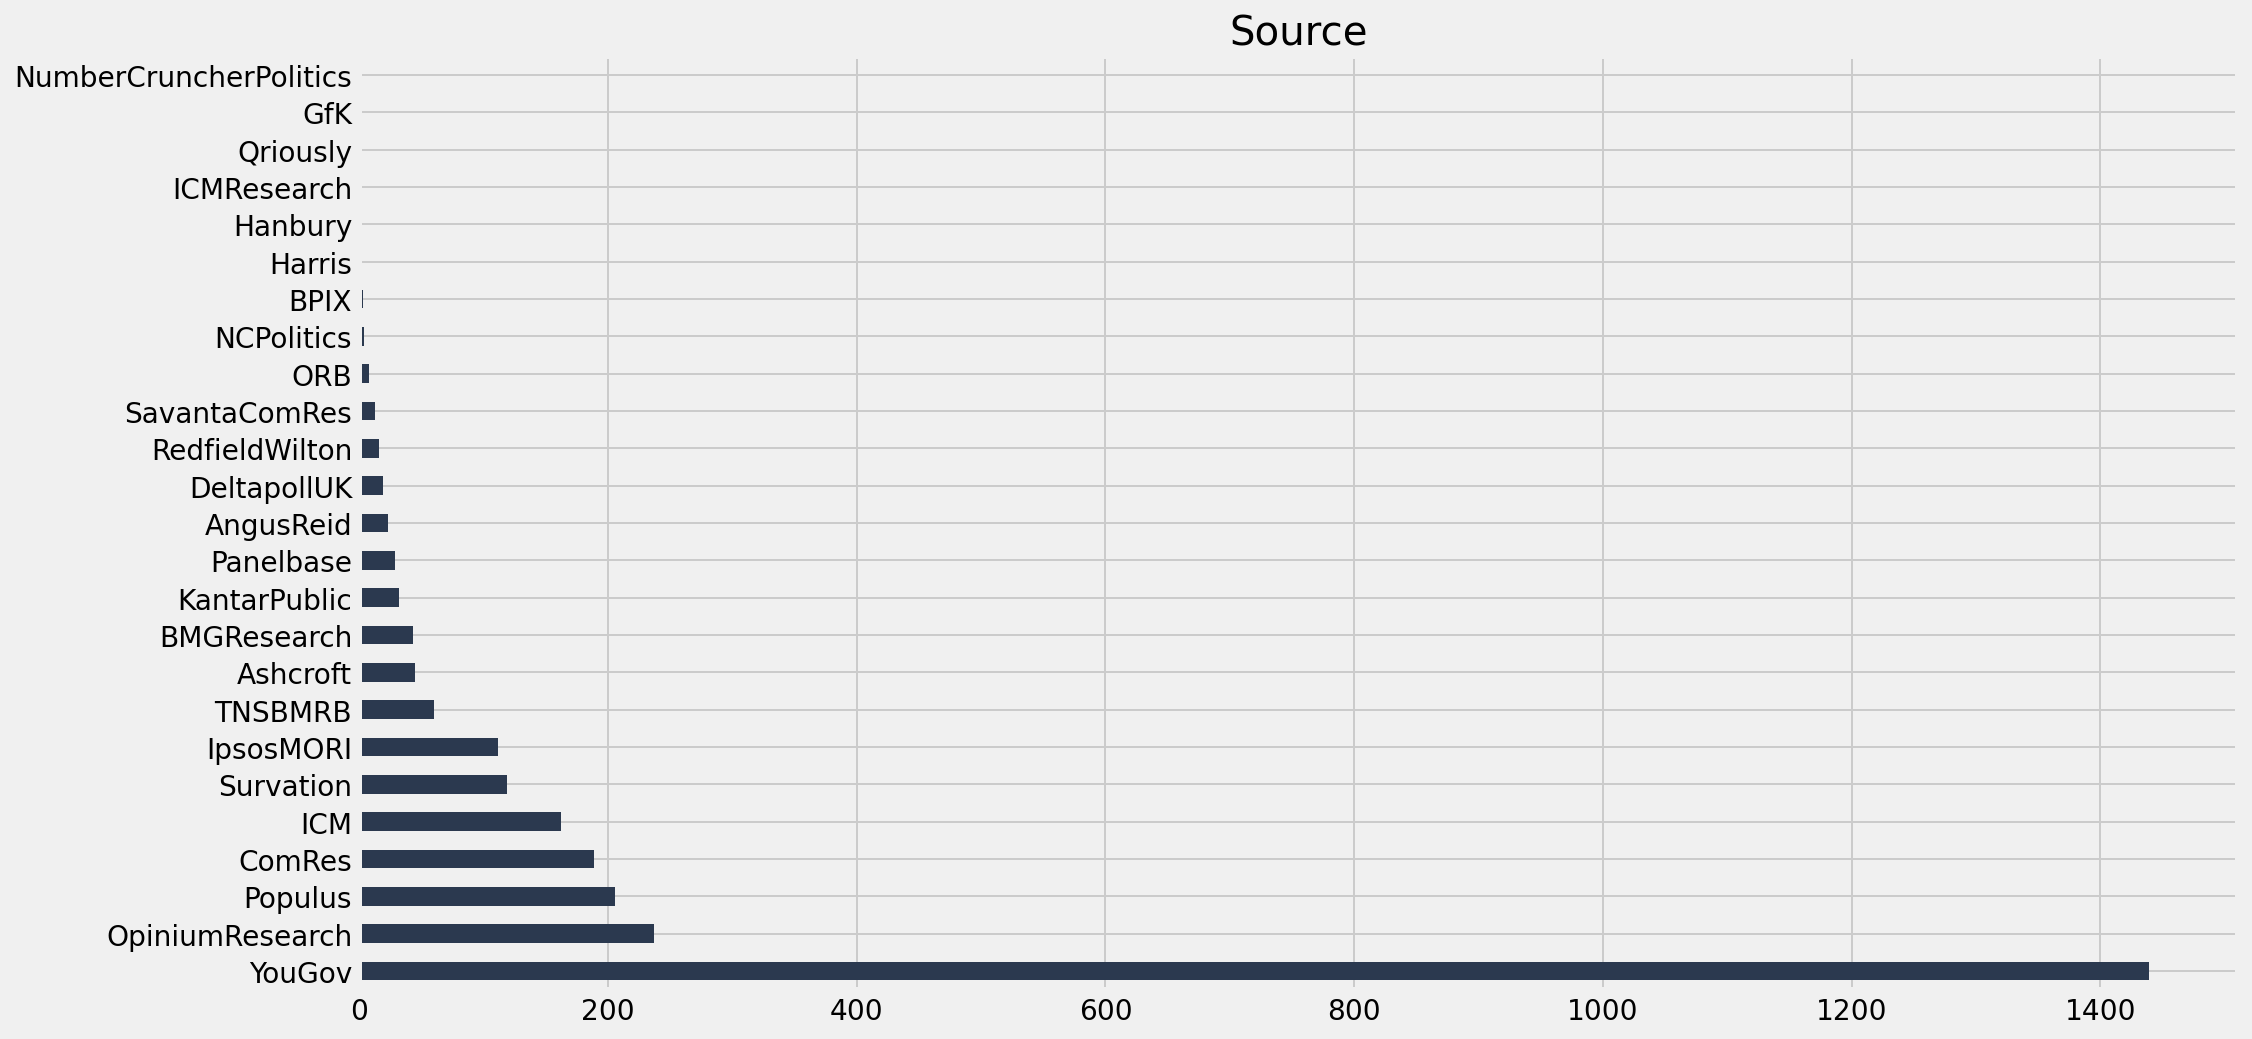

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
df["source"].value_counts().plot(kind='barh', ax=ax, color="#2b394f")
ax.set_title("Source");

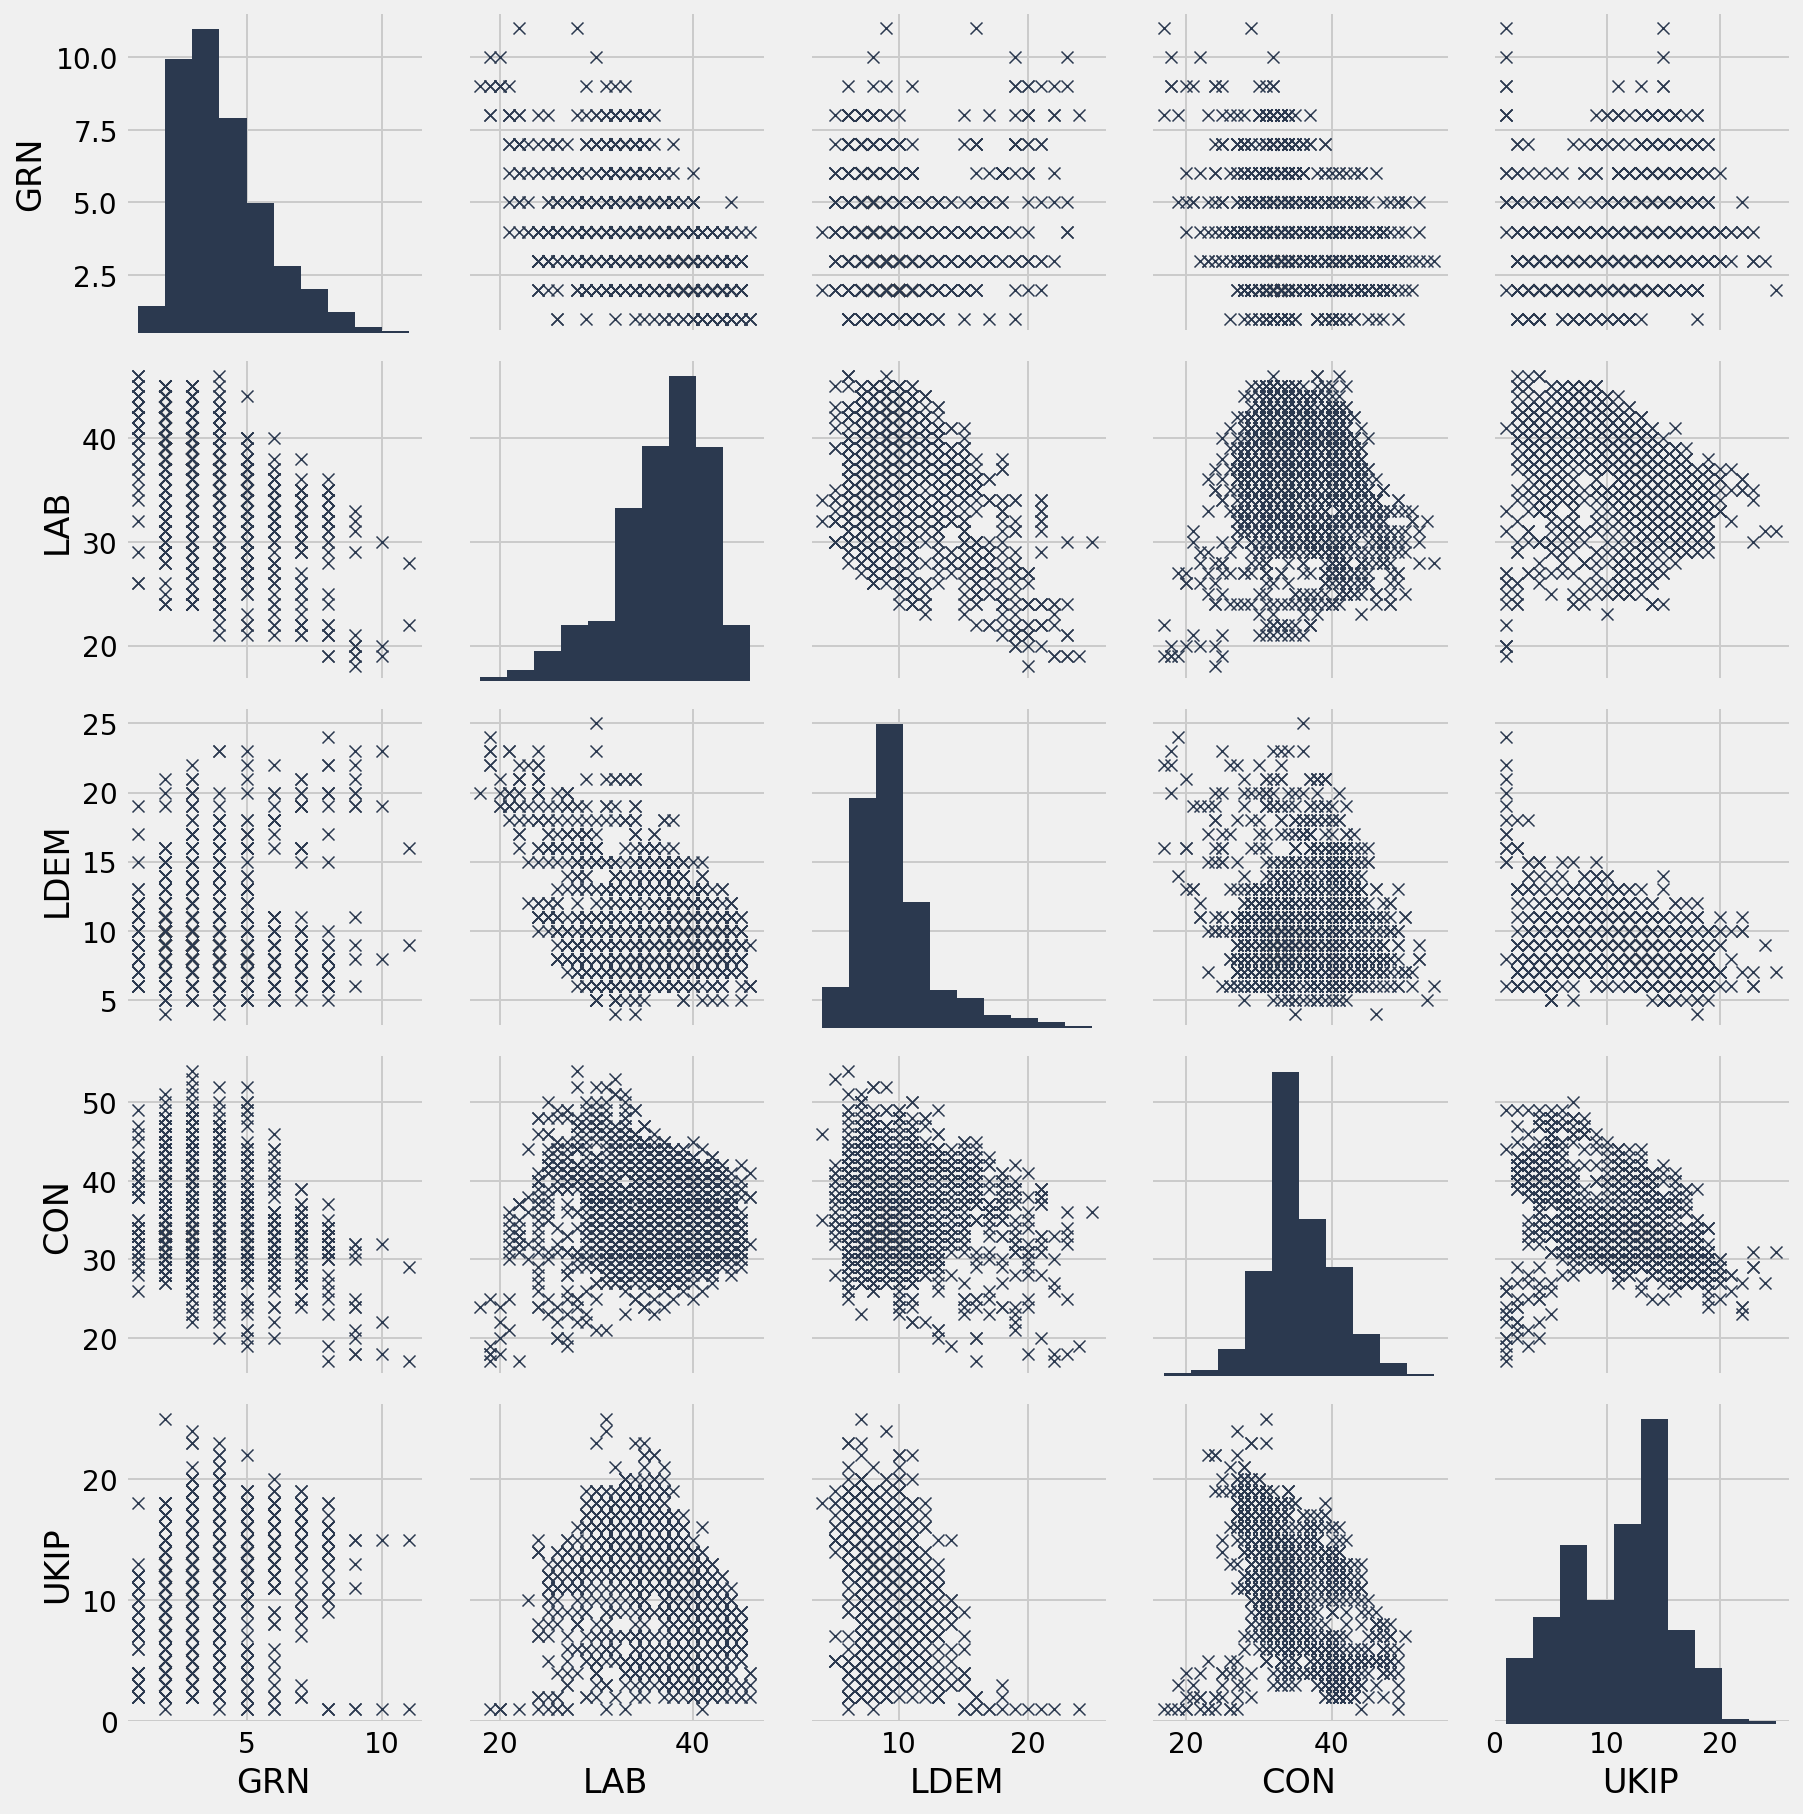

In [19]:
sns.pairplot(df[['GRN', 'LAB', 'LDEM', 'CON', 'UKIP']], markers="x",
             diag_kws={"color": "#2b394f"},
             plot_kws={"color": "#2b394f"});

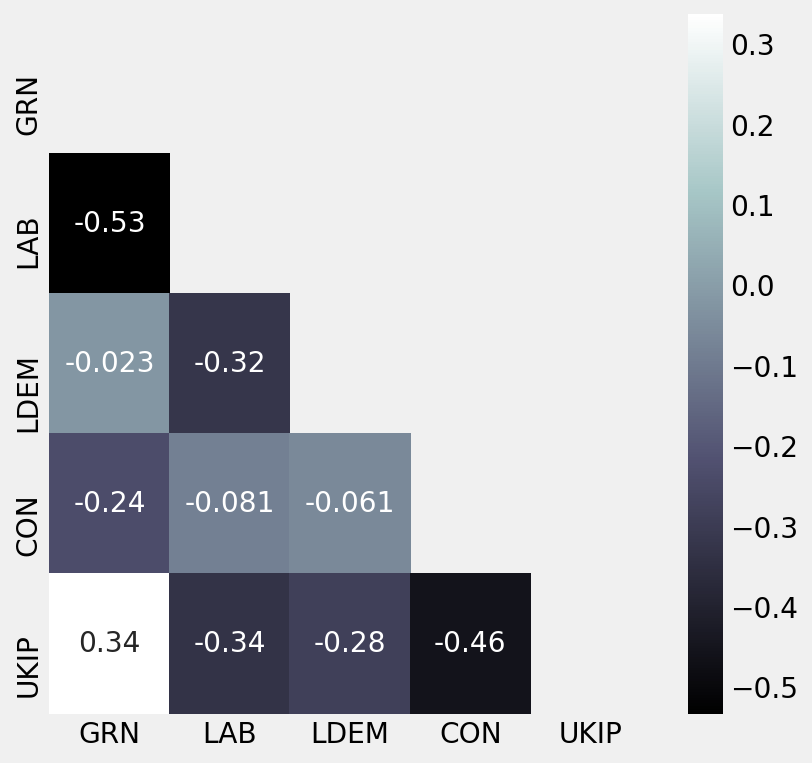

In [20]:
corr = df[['GRN', 'LAB', 'LDEM', 'CON', 'UKIP']].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(6, 6))
sns.heatmap(corr, annot=True, cmap='bone', mask=mask);

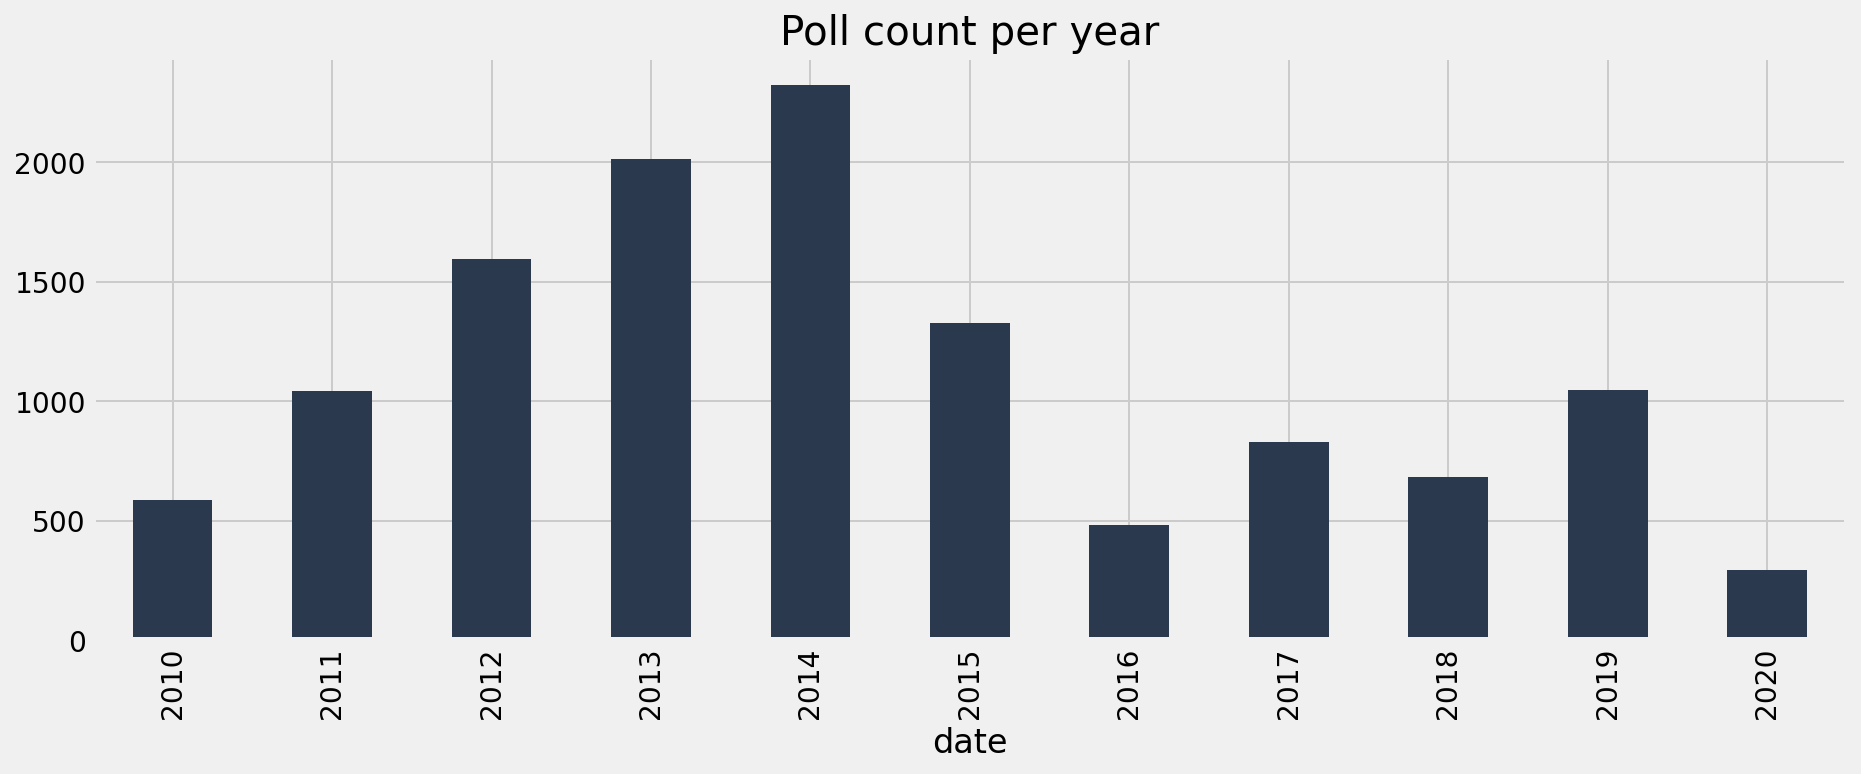

In [21]:
df.groupby(df.index.year)[['GRN', 'LAB', 'LDEM', 'CON', 'UKIP']].count().sum(axis='columns').plot.bar(figsize=(14, 5), color="#2b394f")
plt.title("Poll count per year");

In [22]:
df_w = df.resample("W").mean()

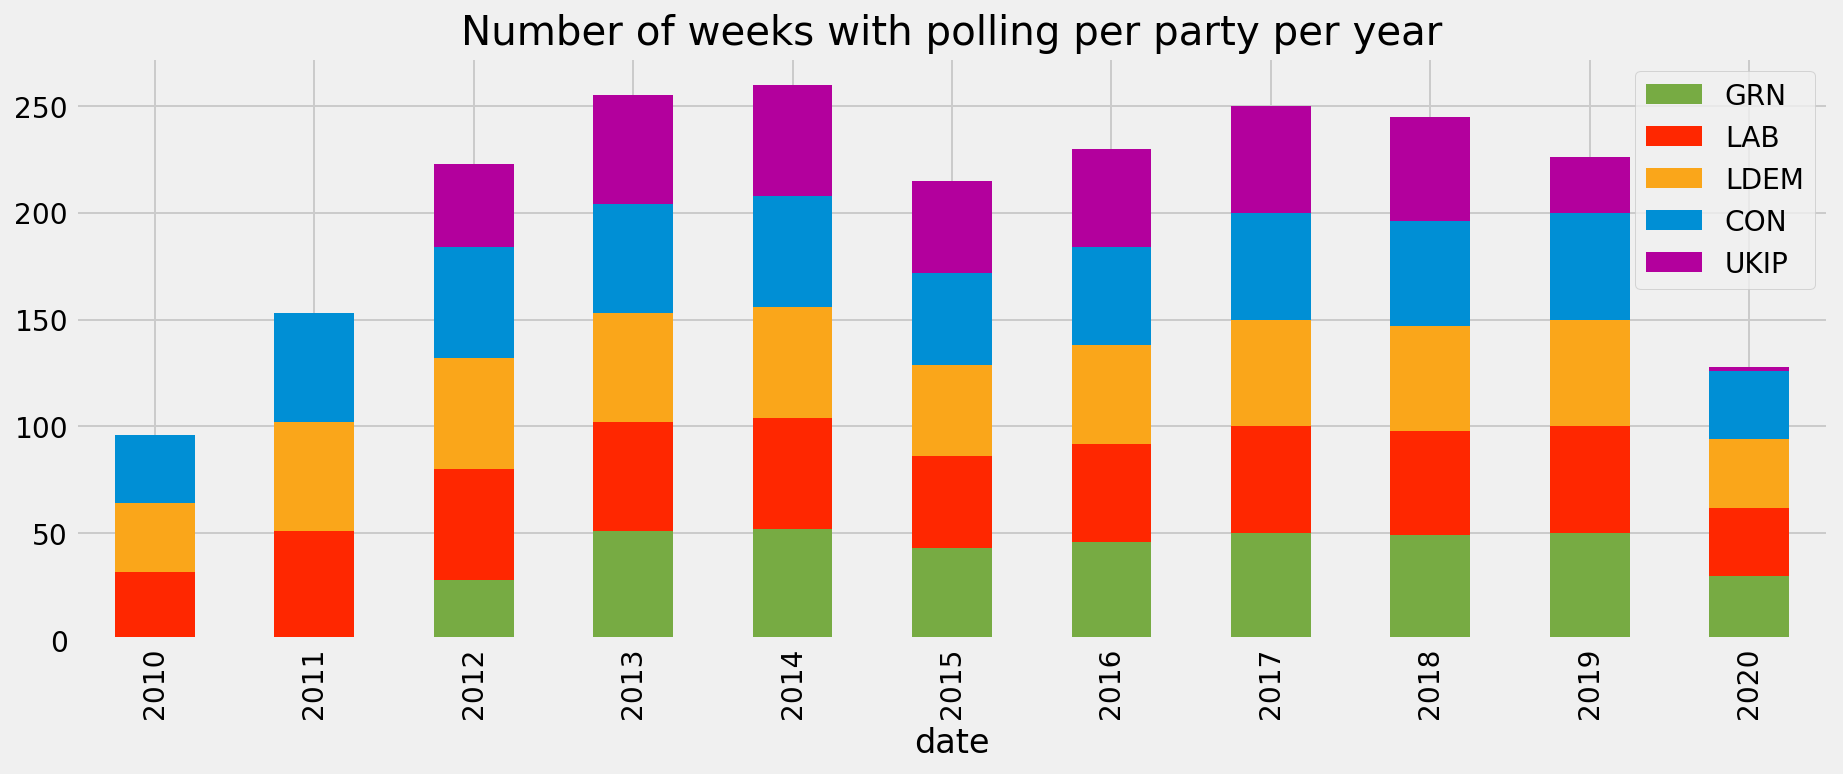

In [23]:
(df_w.groupby(df_w.index.year)[['GRN', 'LAB', 'LDEM', 'CON', 'UKIP']].count()
 .plot.bar(stacked=True,
           figsize=(14, 5),
           color=["#77AB43", "#FF2700", "#FAA61A", "#008FD5", "#B3009D"]));
plt.title("Number of weeks with polling per party per year");

In [24]:
df_w.groupby(df_w.index.year)[['GRN', 'LAB', 'LDEM', 'CON', 'UKIP']].count()

GRN  LAB  LDEM  CON  UKIP
date                           
2010    0   32    32   32     0
2011    0   51    51   51     0
2012   28   52    52   52    39
2013   51   51    51   51    51
2014   52   52    52   52    52
2015   43   43    43   43    43
2016   46   46    46   46    46
2017   50   50    50   50    50
2018   49   49    49   49    49
2019   50   50    50   50    26
2020   30   32    32   32     2

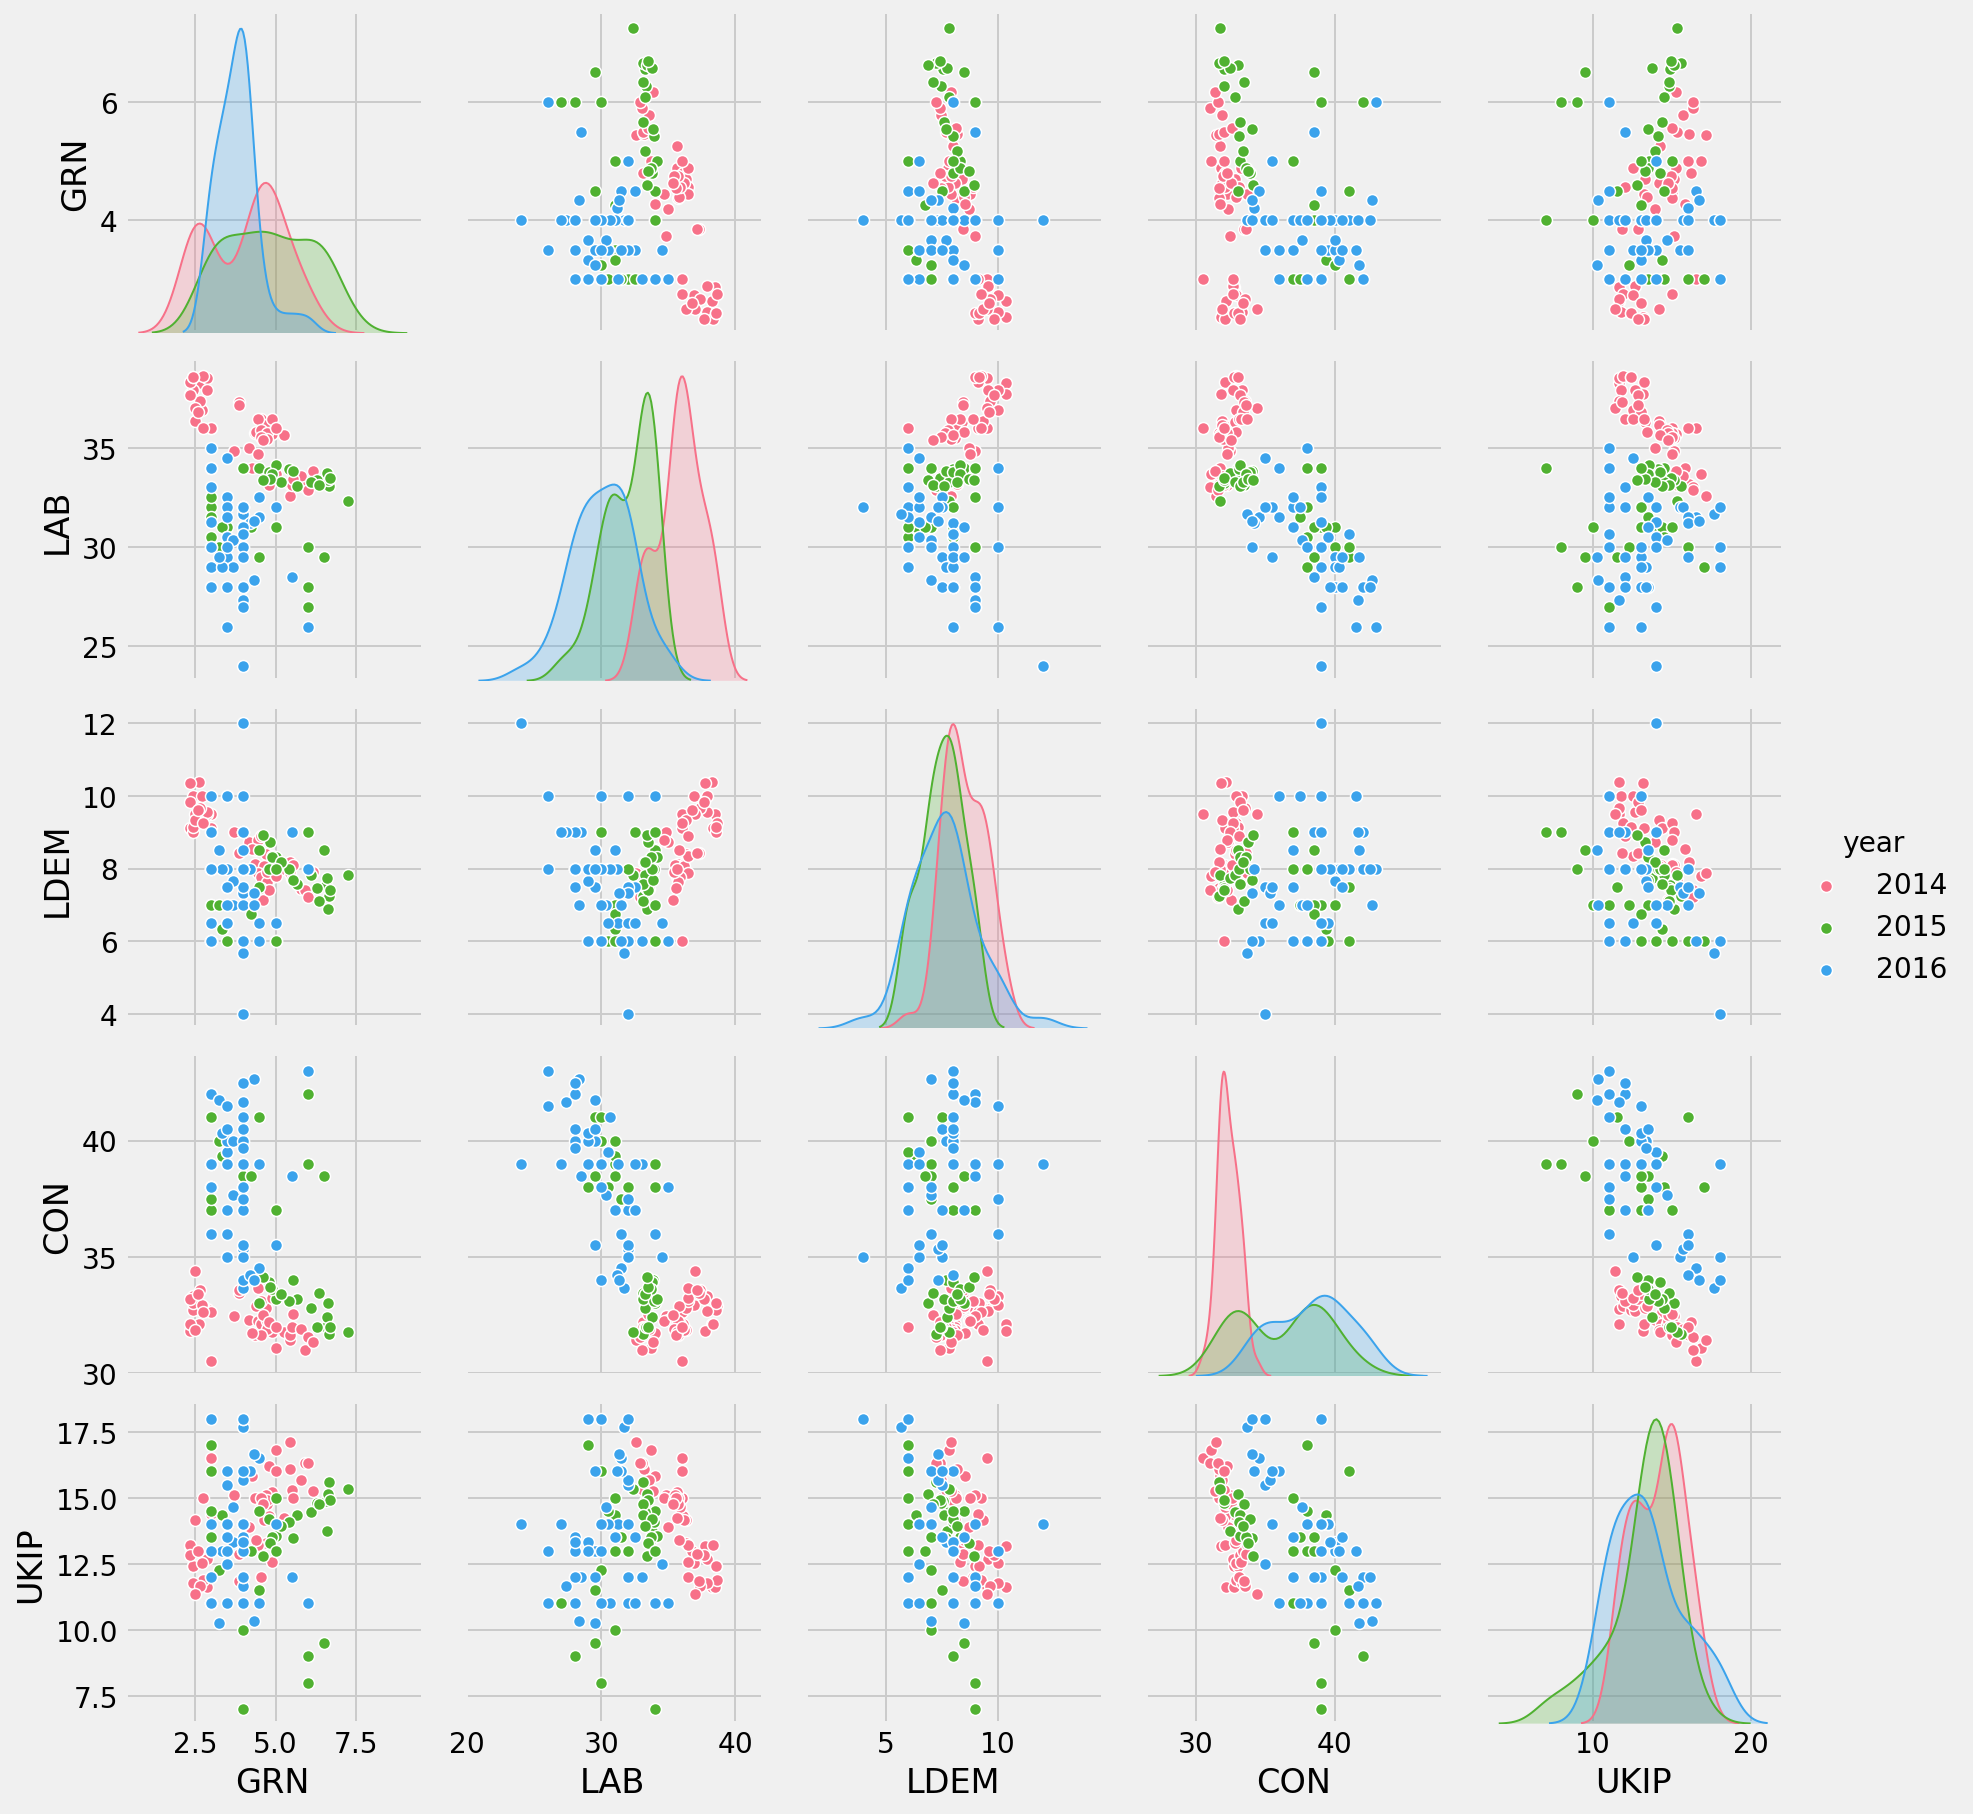

In [25]:
sns.pairplot(df_w.assign(year=df_w.index.year).query('2014 <= year <= 2016'),
             hue='year', palette="husl", vars=['GRN', 'LAB', 'LDEM', 'CON', 'UKIP'],
             diag_kws={"linewidth": 1})

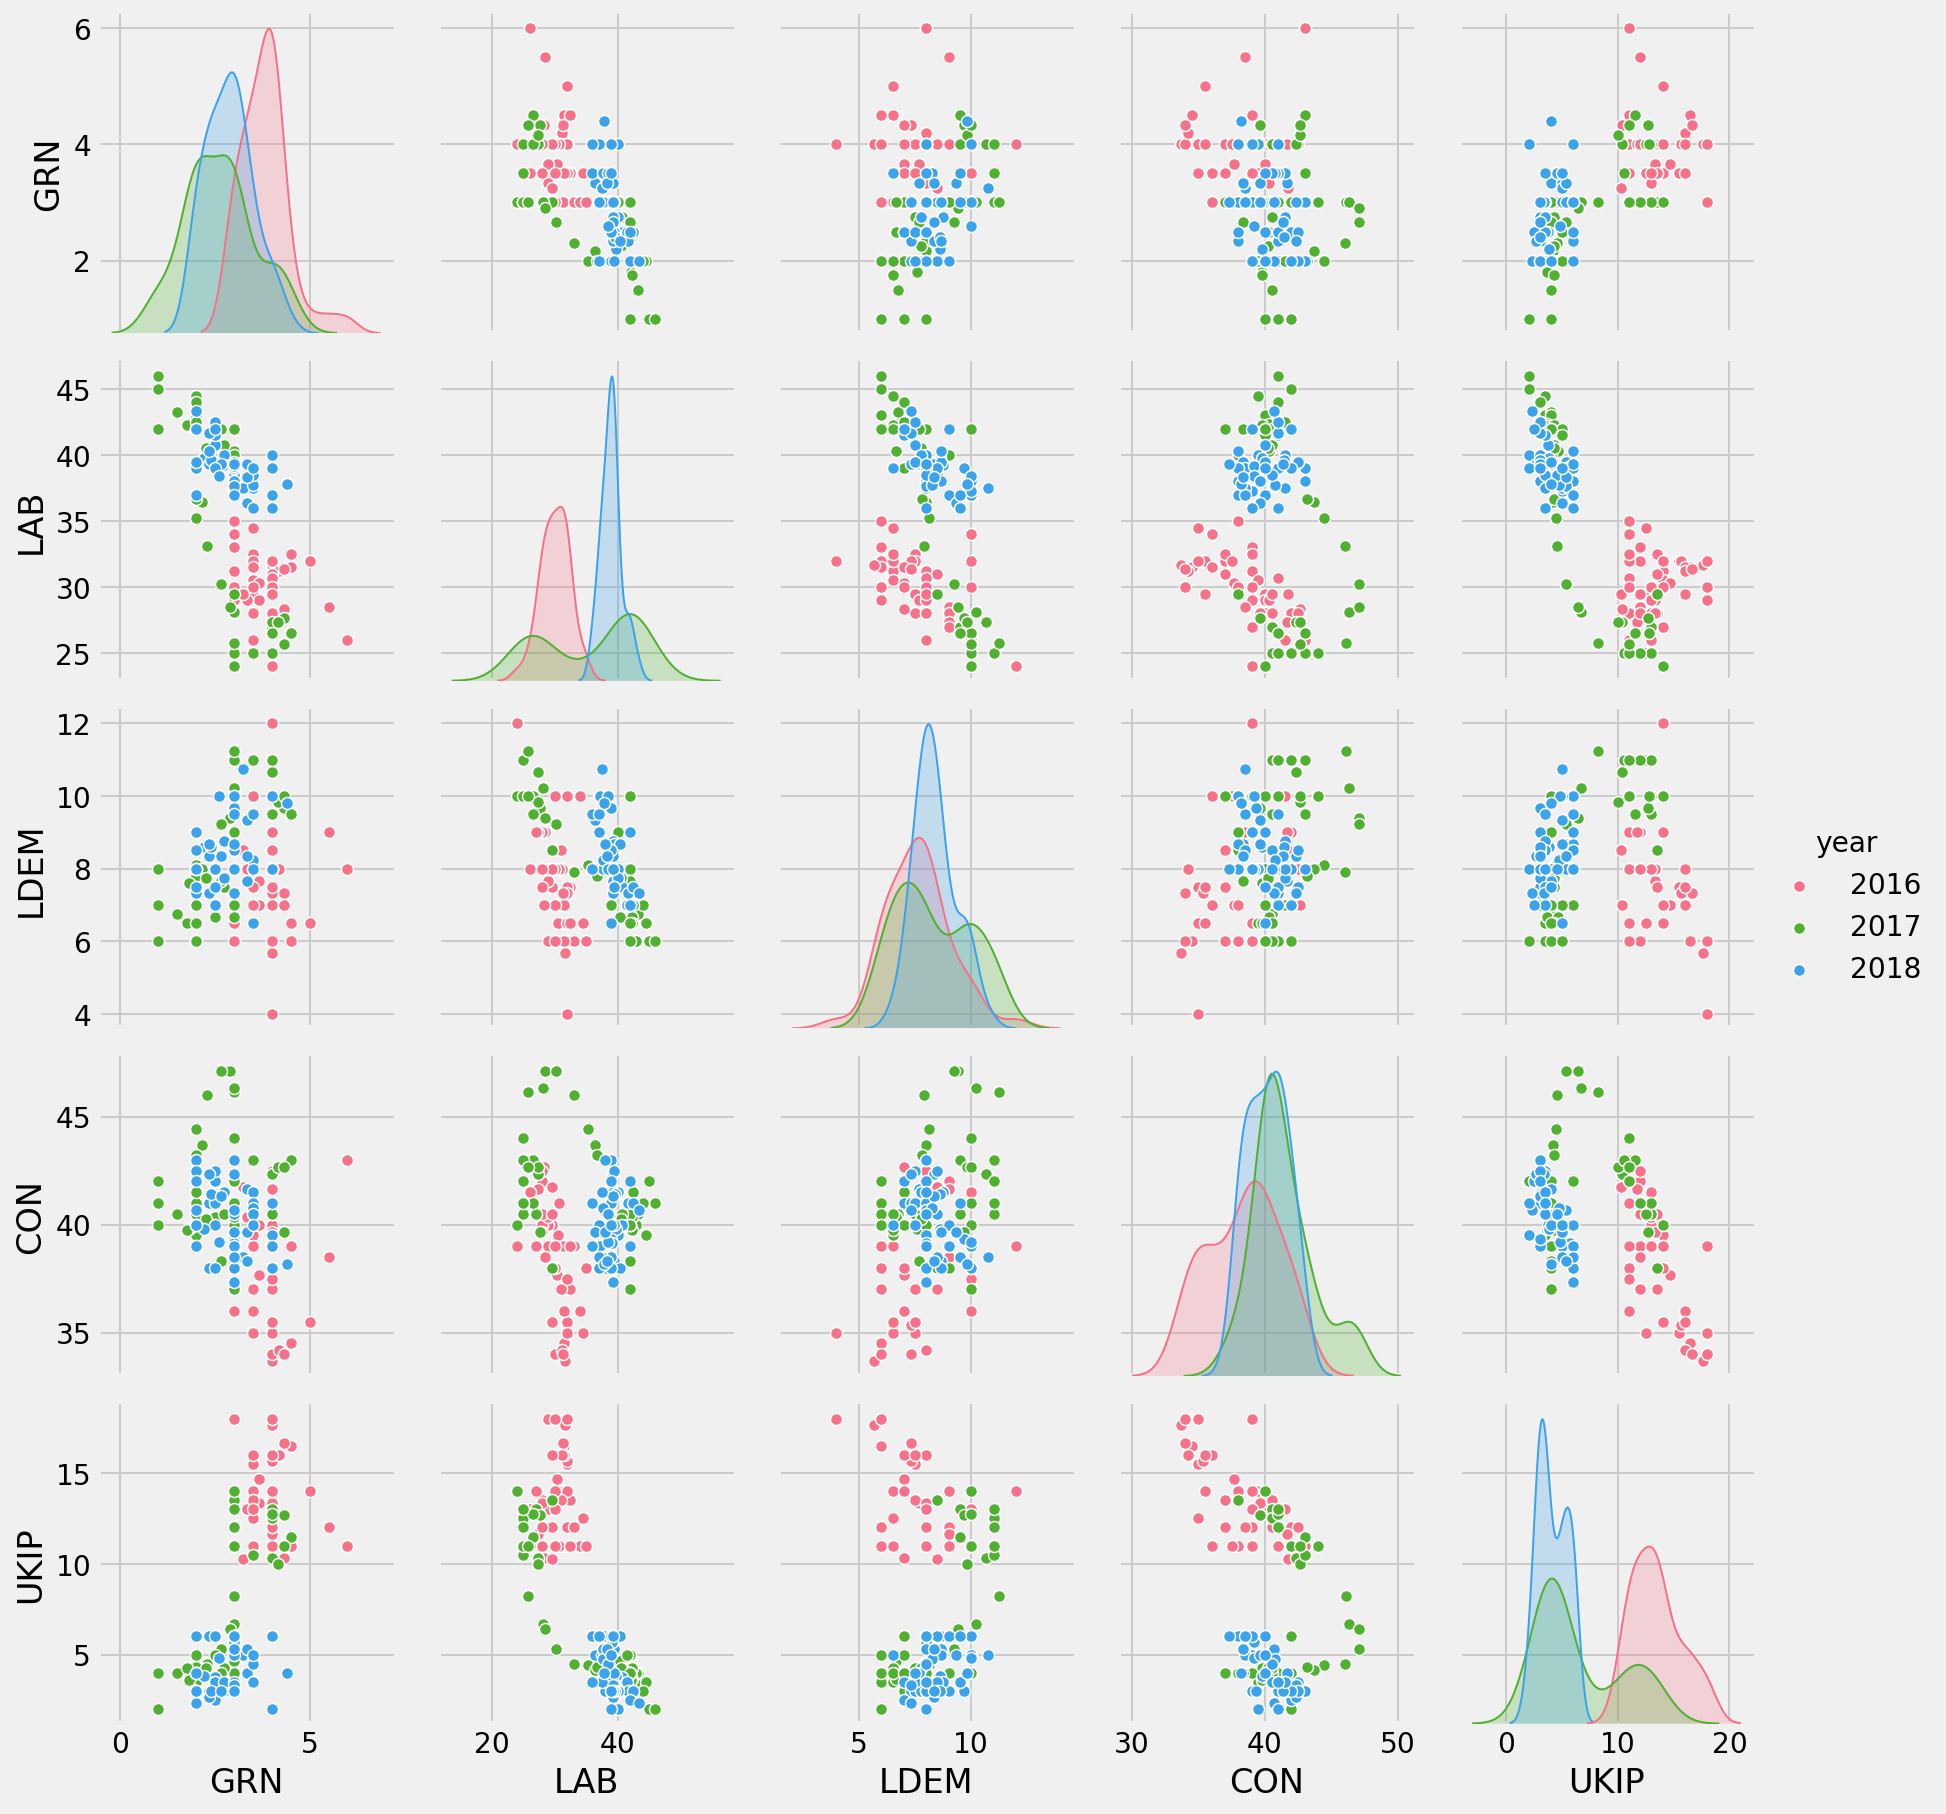

In [26]:
sns.pairplot(df_w.assign(year=df_w.index.year).query('2016 <= year <= 2018'),
             hue='year', palette="husl", vars=['GRN', 'LAB', 'LDEM', 'CON', 'UKIP'],
             diag_kws={"linewidth": 1})

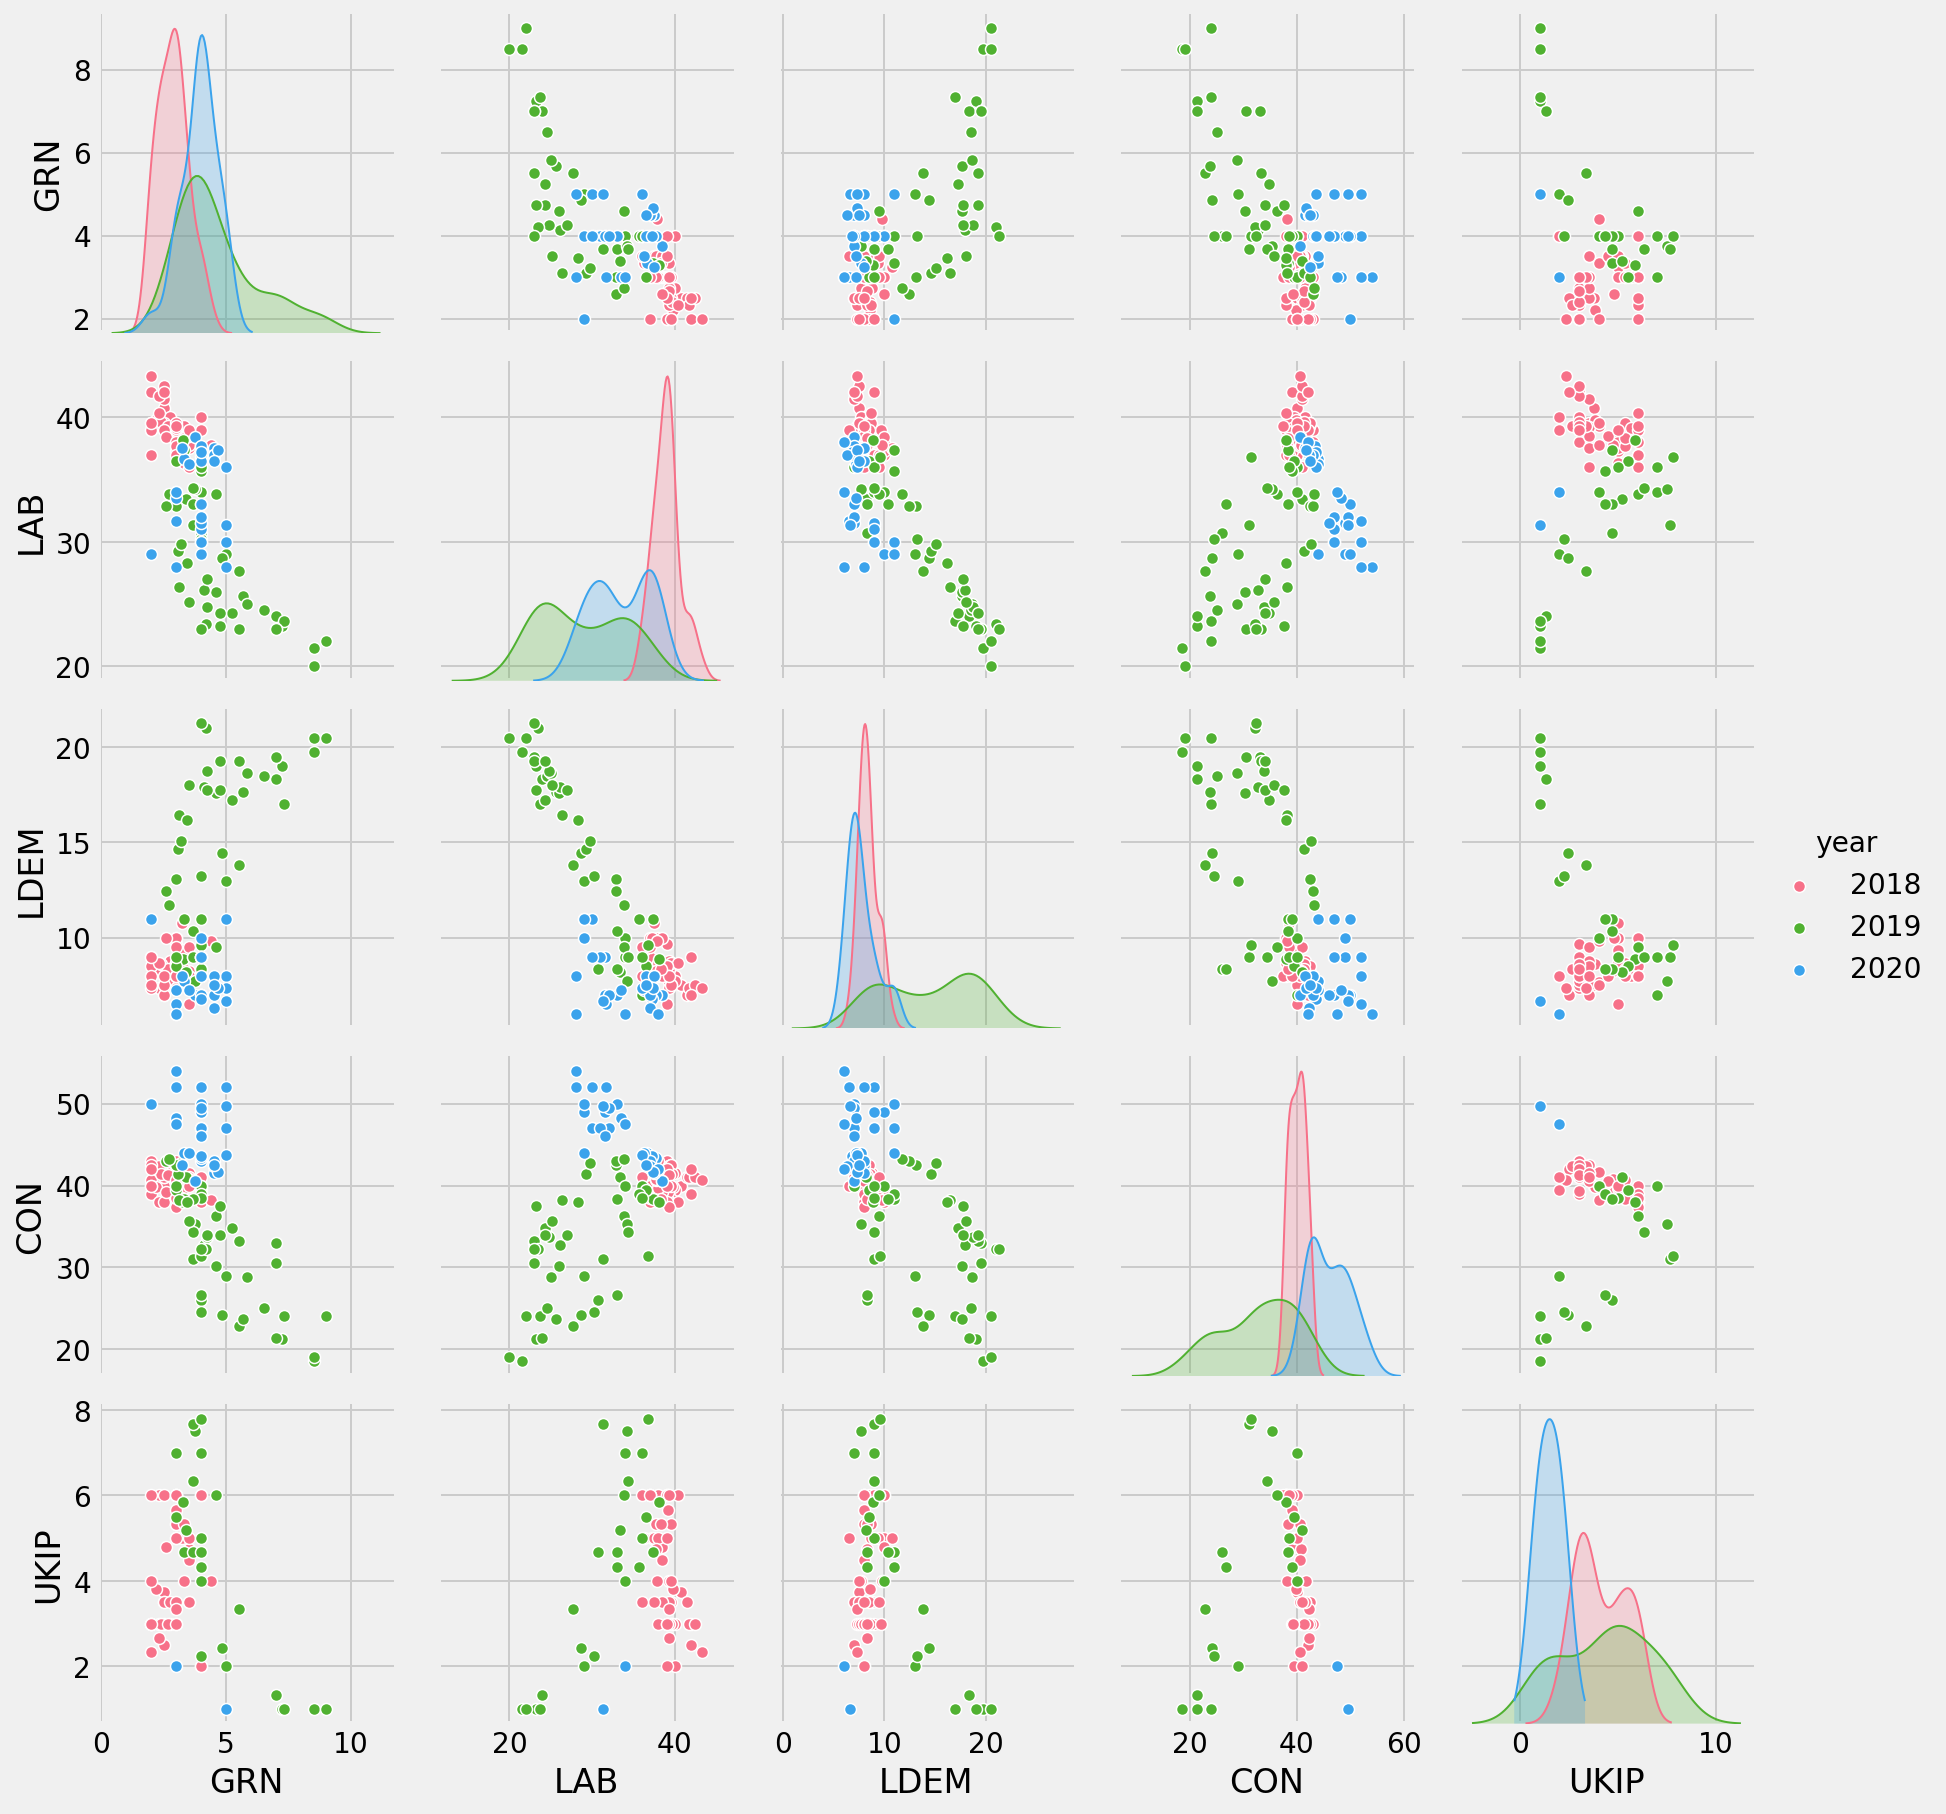

In [27]:
sns.pairplot(df_w.assign(year=df_w.index.year).query('2018 <= year <= 2020'),
             hue='year', palette="husl", vars=['GRN', 'LAB', 'LDEM', 'CON', 'UKIP'],
             diag_kws={"linewidth": 1})

/home/ubuntu/anaconda3/envs/email-service/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/home/ubuntu/anaconda3/envs/email-service/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/home/ubuntu/anaconda3/envs/email-service/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (wh

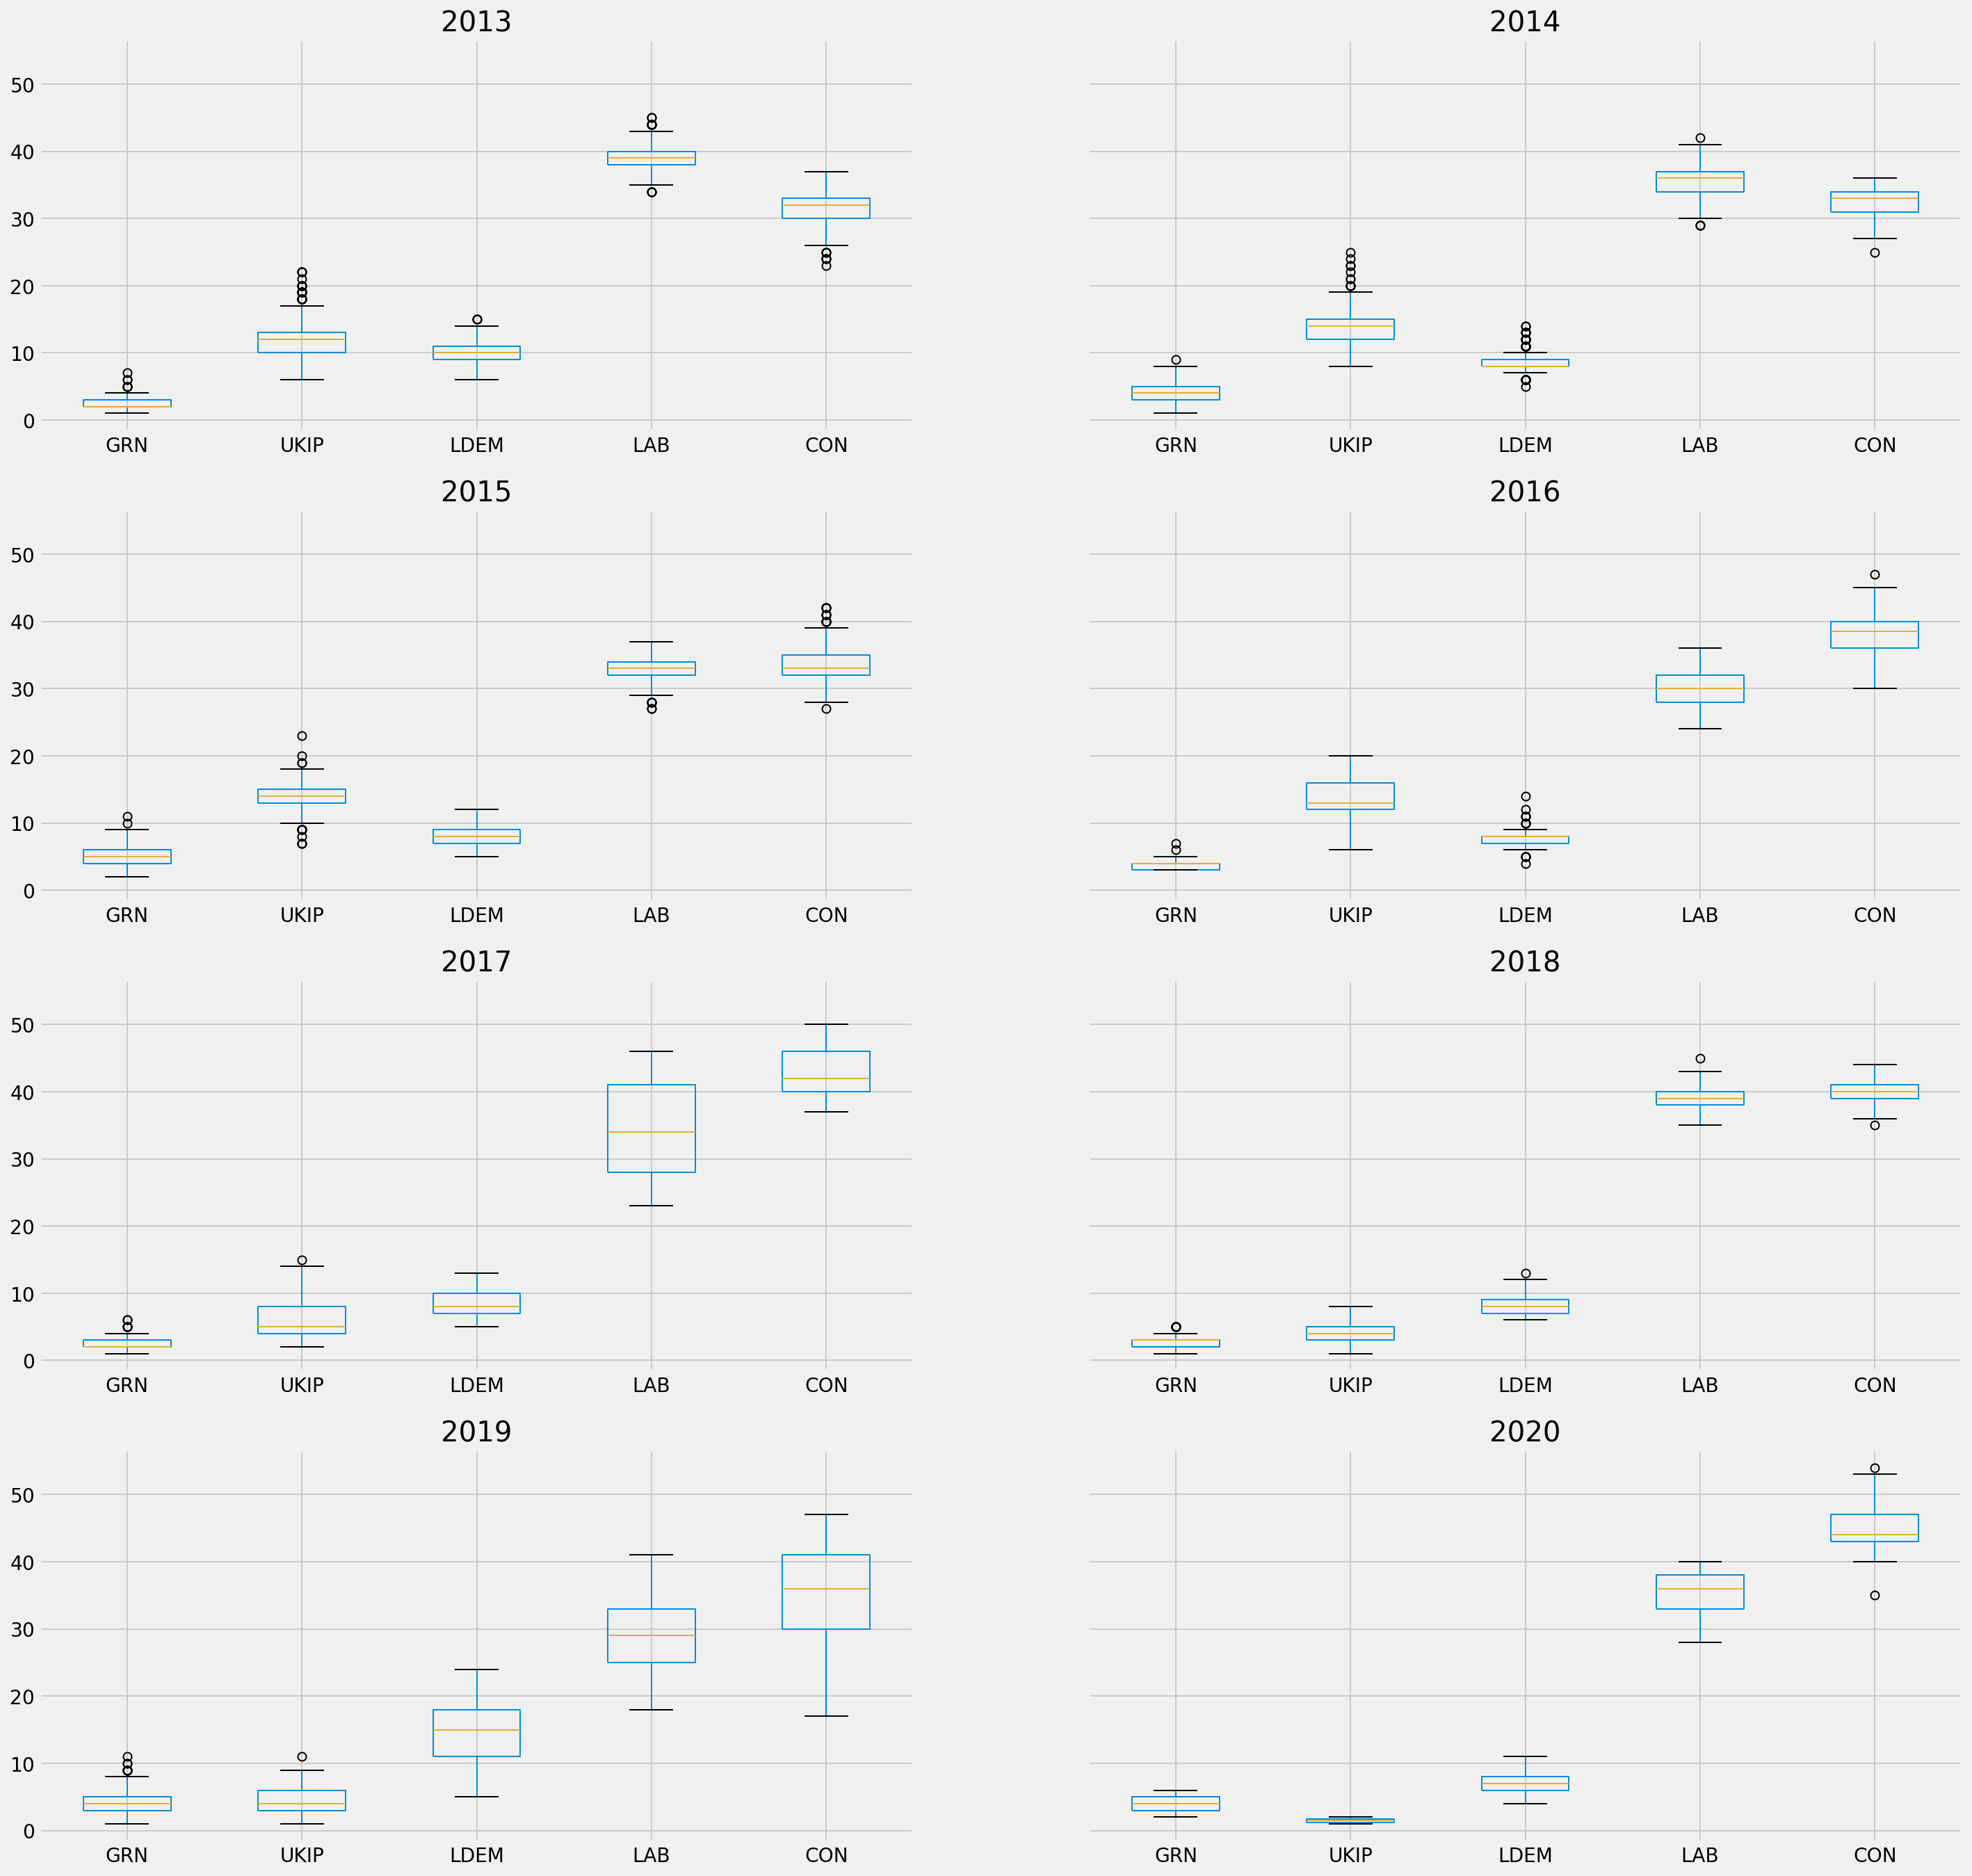

In [28]:
tmp = df[df.index.year >= 2013][["GRN", "UKIP", "LDEM", "LAB", "CON"]]
tmp.groupby(tmp.index.year).boxplot(figsize=(24, 24), layout=(4, 2));

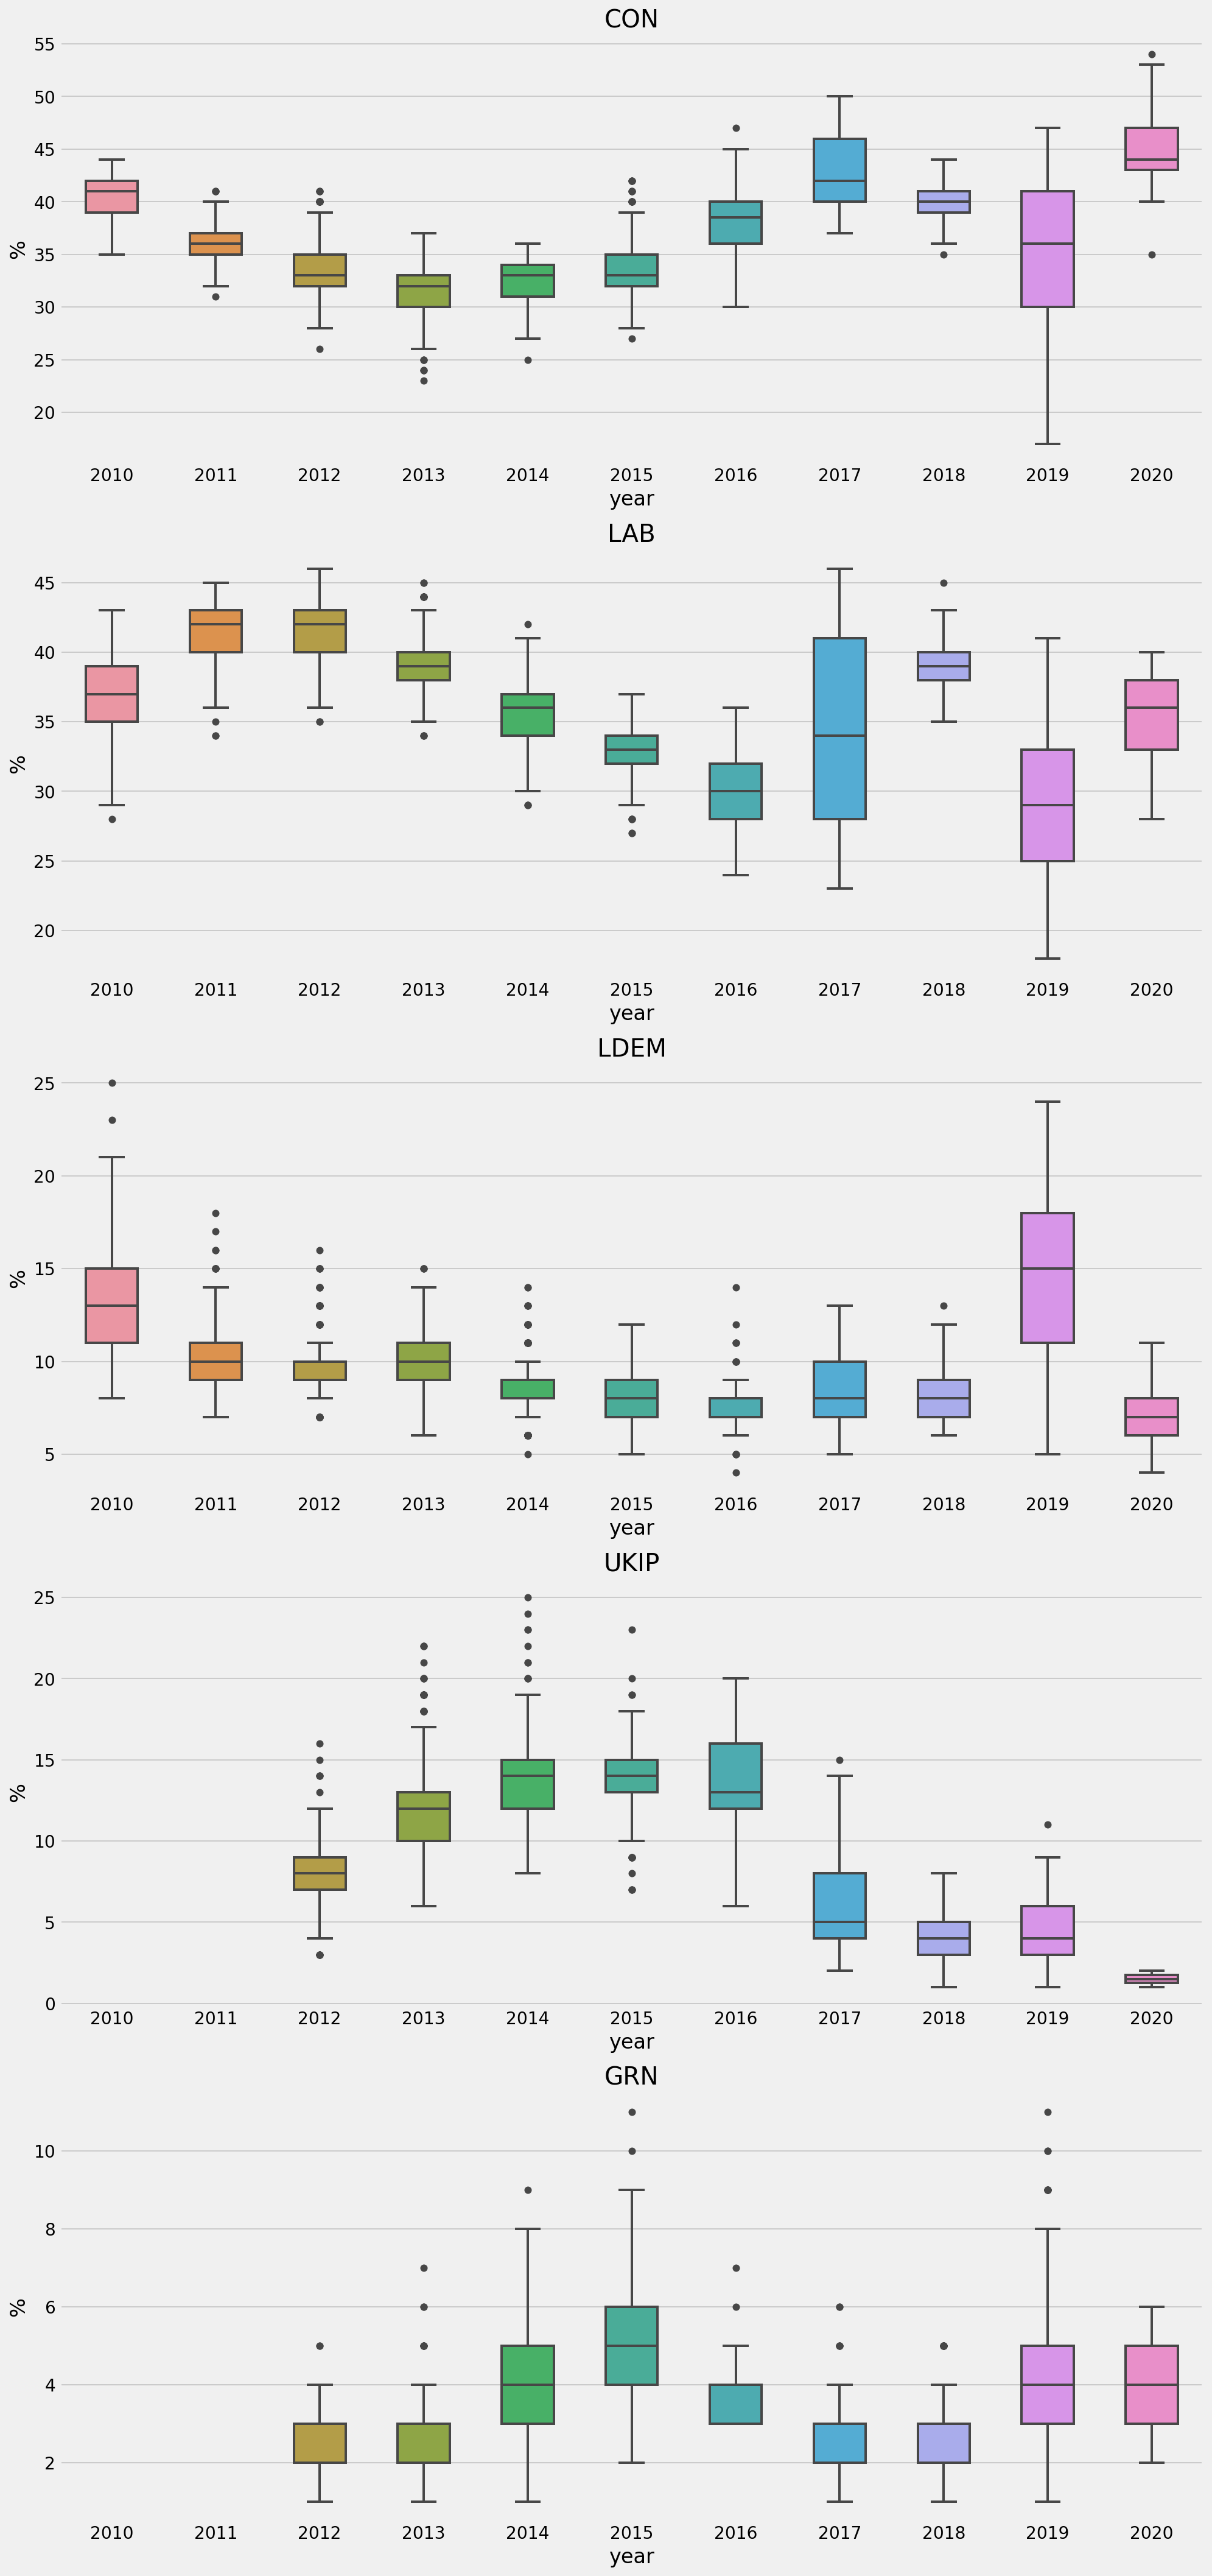

In [29]:
boxprops = {"linewidth": 2}
medianprops = {"linewidth": 2}
whiskerprops = {"linewidth": 2}
capprops = {"linewidth": 2}
flierprops = {"marker": "o"}
fig, axes = plt.subplots(5, 1, figsize=(15, 35))
for party, ax in zip(['CON', 'LAB', 'LDEM', 'UKIP', 'GRN'], axes):
    sns.boxplot(data=df.assign(year=df.index.year), x='year', y=party, width=0.5, ax=ax,
                boxprops=boxprops, medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops, flierprops=flierprops)
    ax.set_title(party)
    ax.set_ylabel("%")

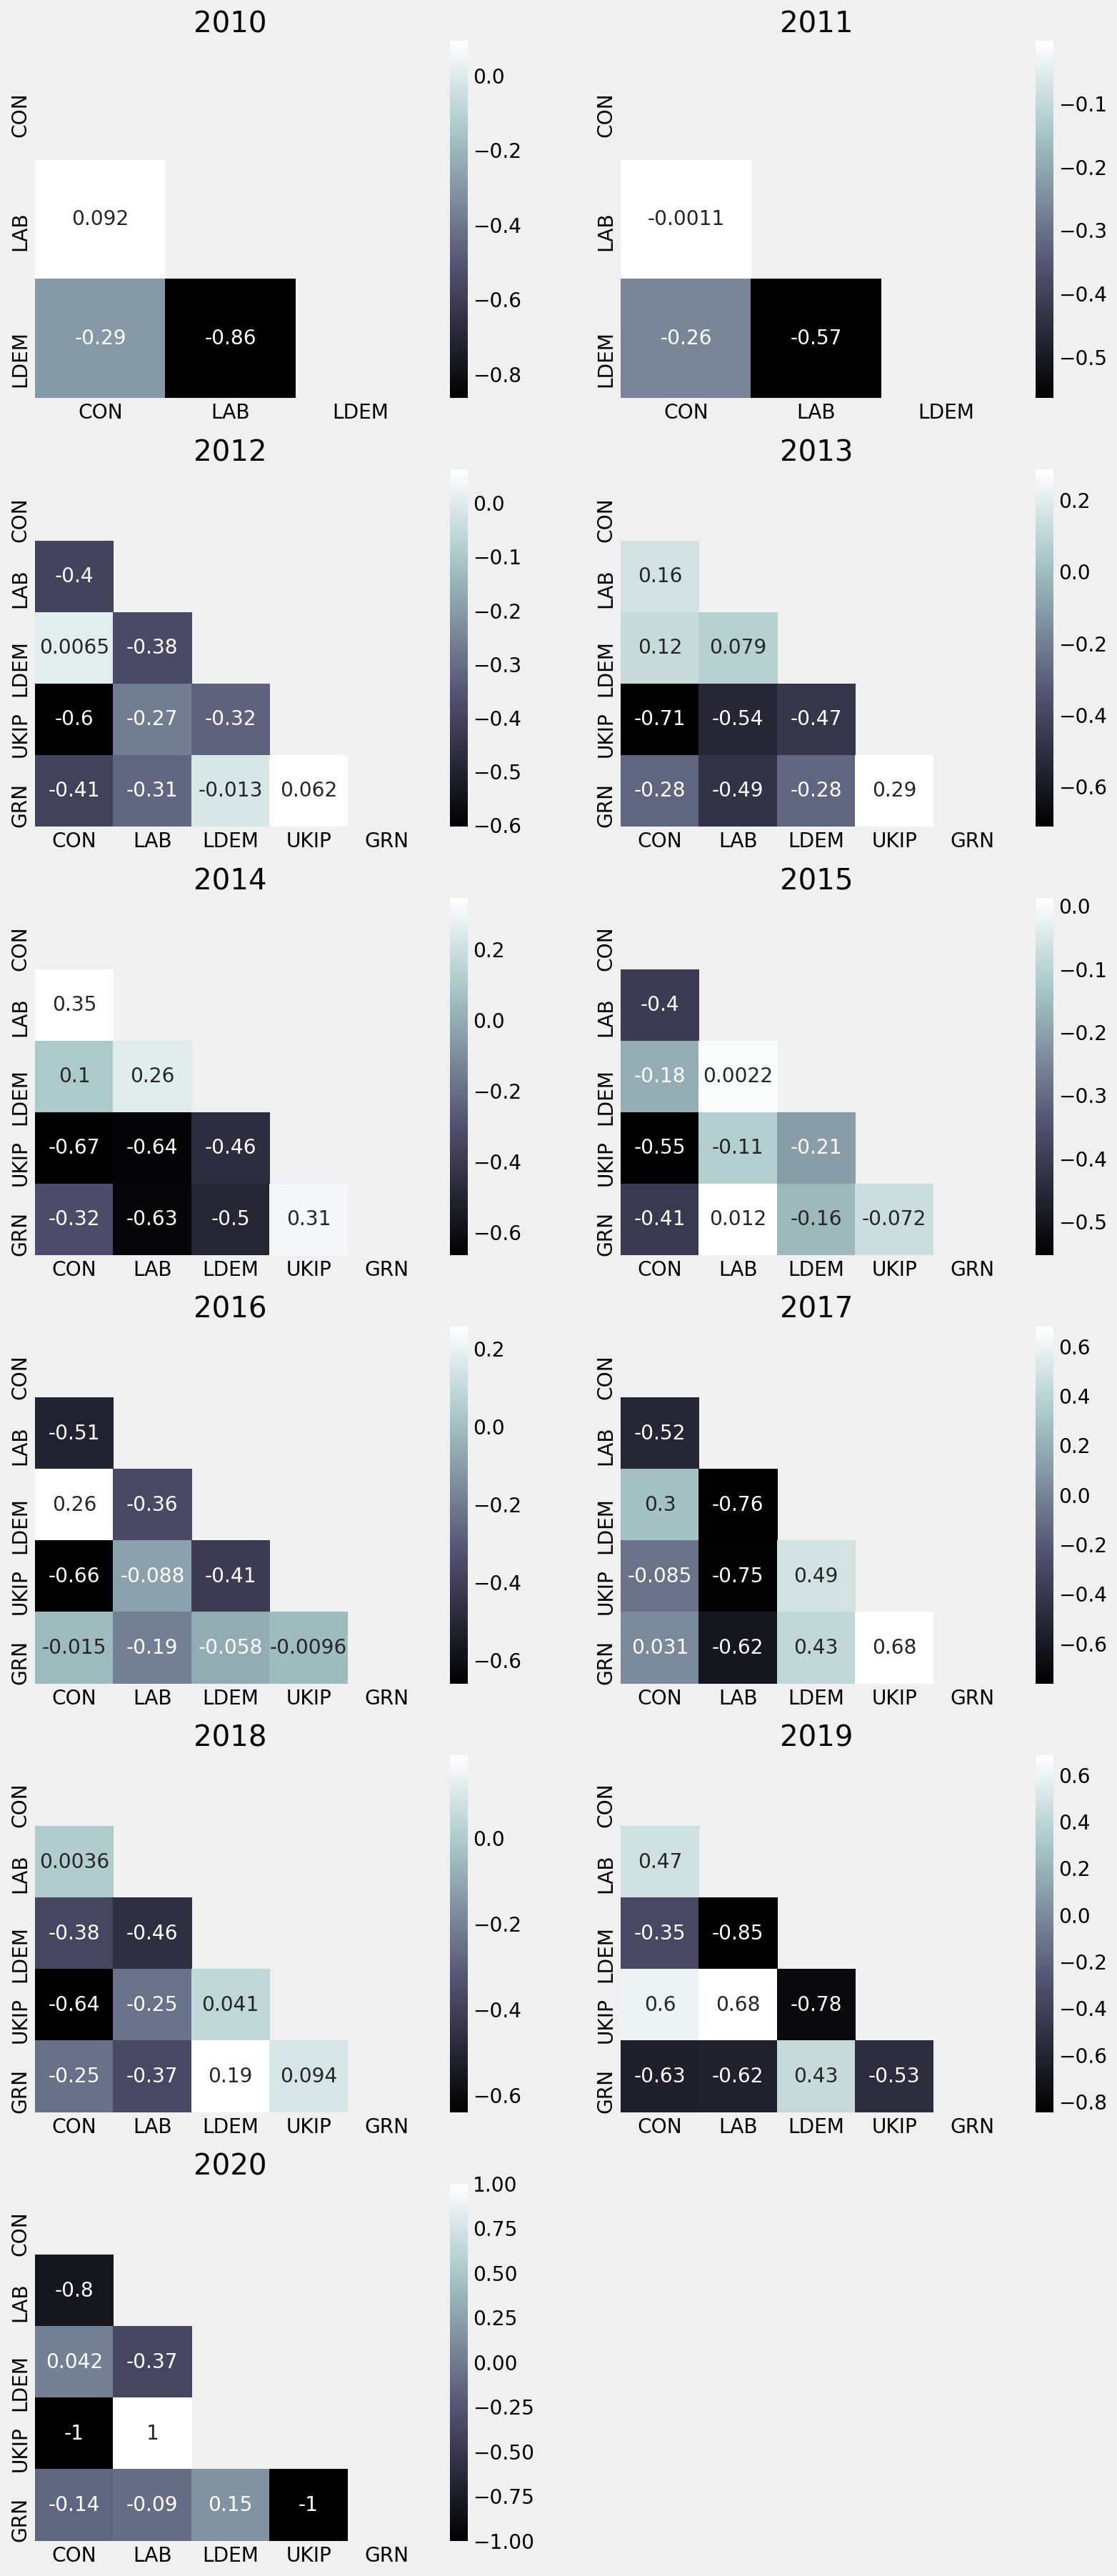

In [30]:
correlations = df.groupby(df.index.year)[['CON', 'LAB', 'LDEM', 'UKIP', 'GRN']].corr().transpose()
fig, axes = plt.subplots(6, 2, figsize=(12, 30))
for year, (i, j) in zip(df.index.year.unique(), product(range(6), range(2))):
    corr = (correlations[year]
            .dropna(how="all", axis="rows")
            .dropna(how="all", axis="columns"))
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr,
                annot=True,
                ax=axes[i][j],
                mask=mask,
                cmap='bone')
    axes[i][j].set_title(year)
axes[5, 1].remove() 

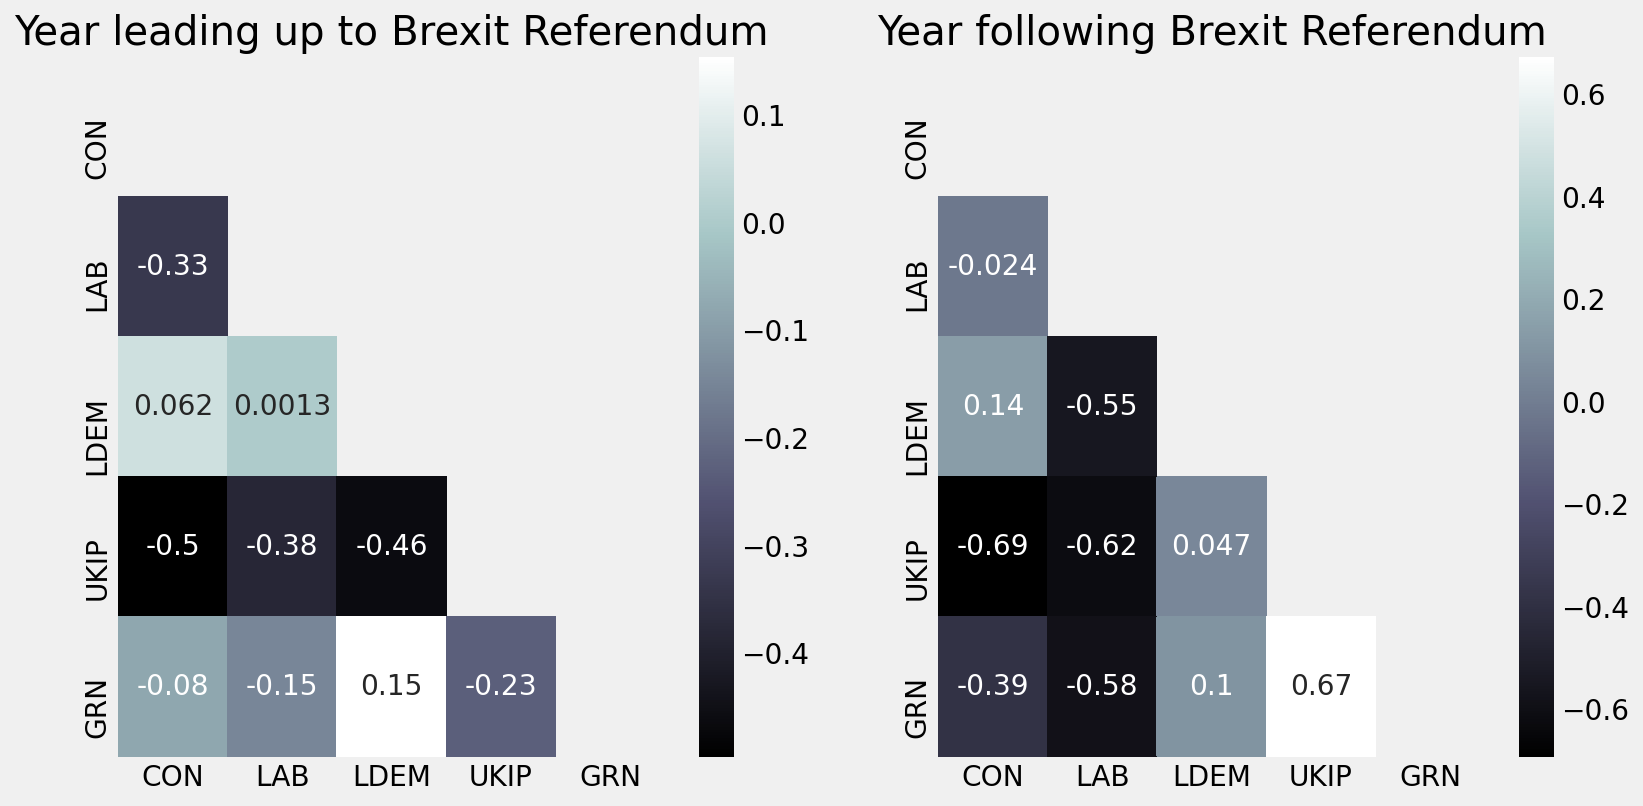

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
corr = df[(df.index >= pd.to_datetime("23 June 2015")) & (df.index <= pd.to_datetime("23 June 2016"))][['CON', 'LAB', 'LDEM', 'UKIP', 'GRN']].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,
            annot=True,
            ax=ax1,
            mask=mask,
            cmap='bone')
ax1.set_title("Year leading up to Brexit Referendum")
corr = df[(df.index >= pd.to_datetime("23 June 2016")) & (df.index <= pd.to_datetime("23 June 2017"))][['CON', 'LAB', 'LDEM', 'UKIP', 'GRN']].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,
            annot=True,
            ax=ax2,
            mask=mask,
            cmap='bone')
ax2.set_title("Year following Brexit Referendum");

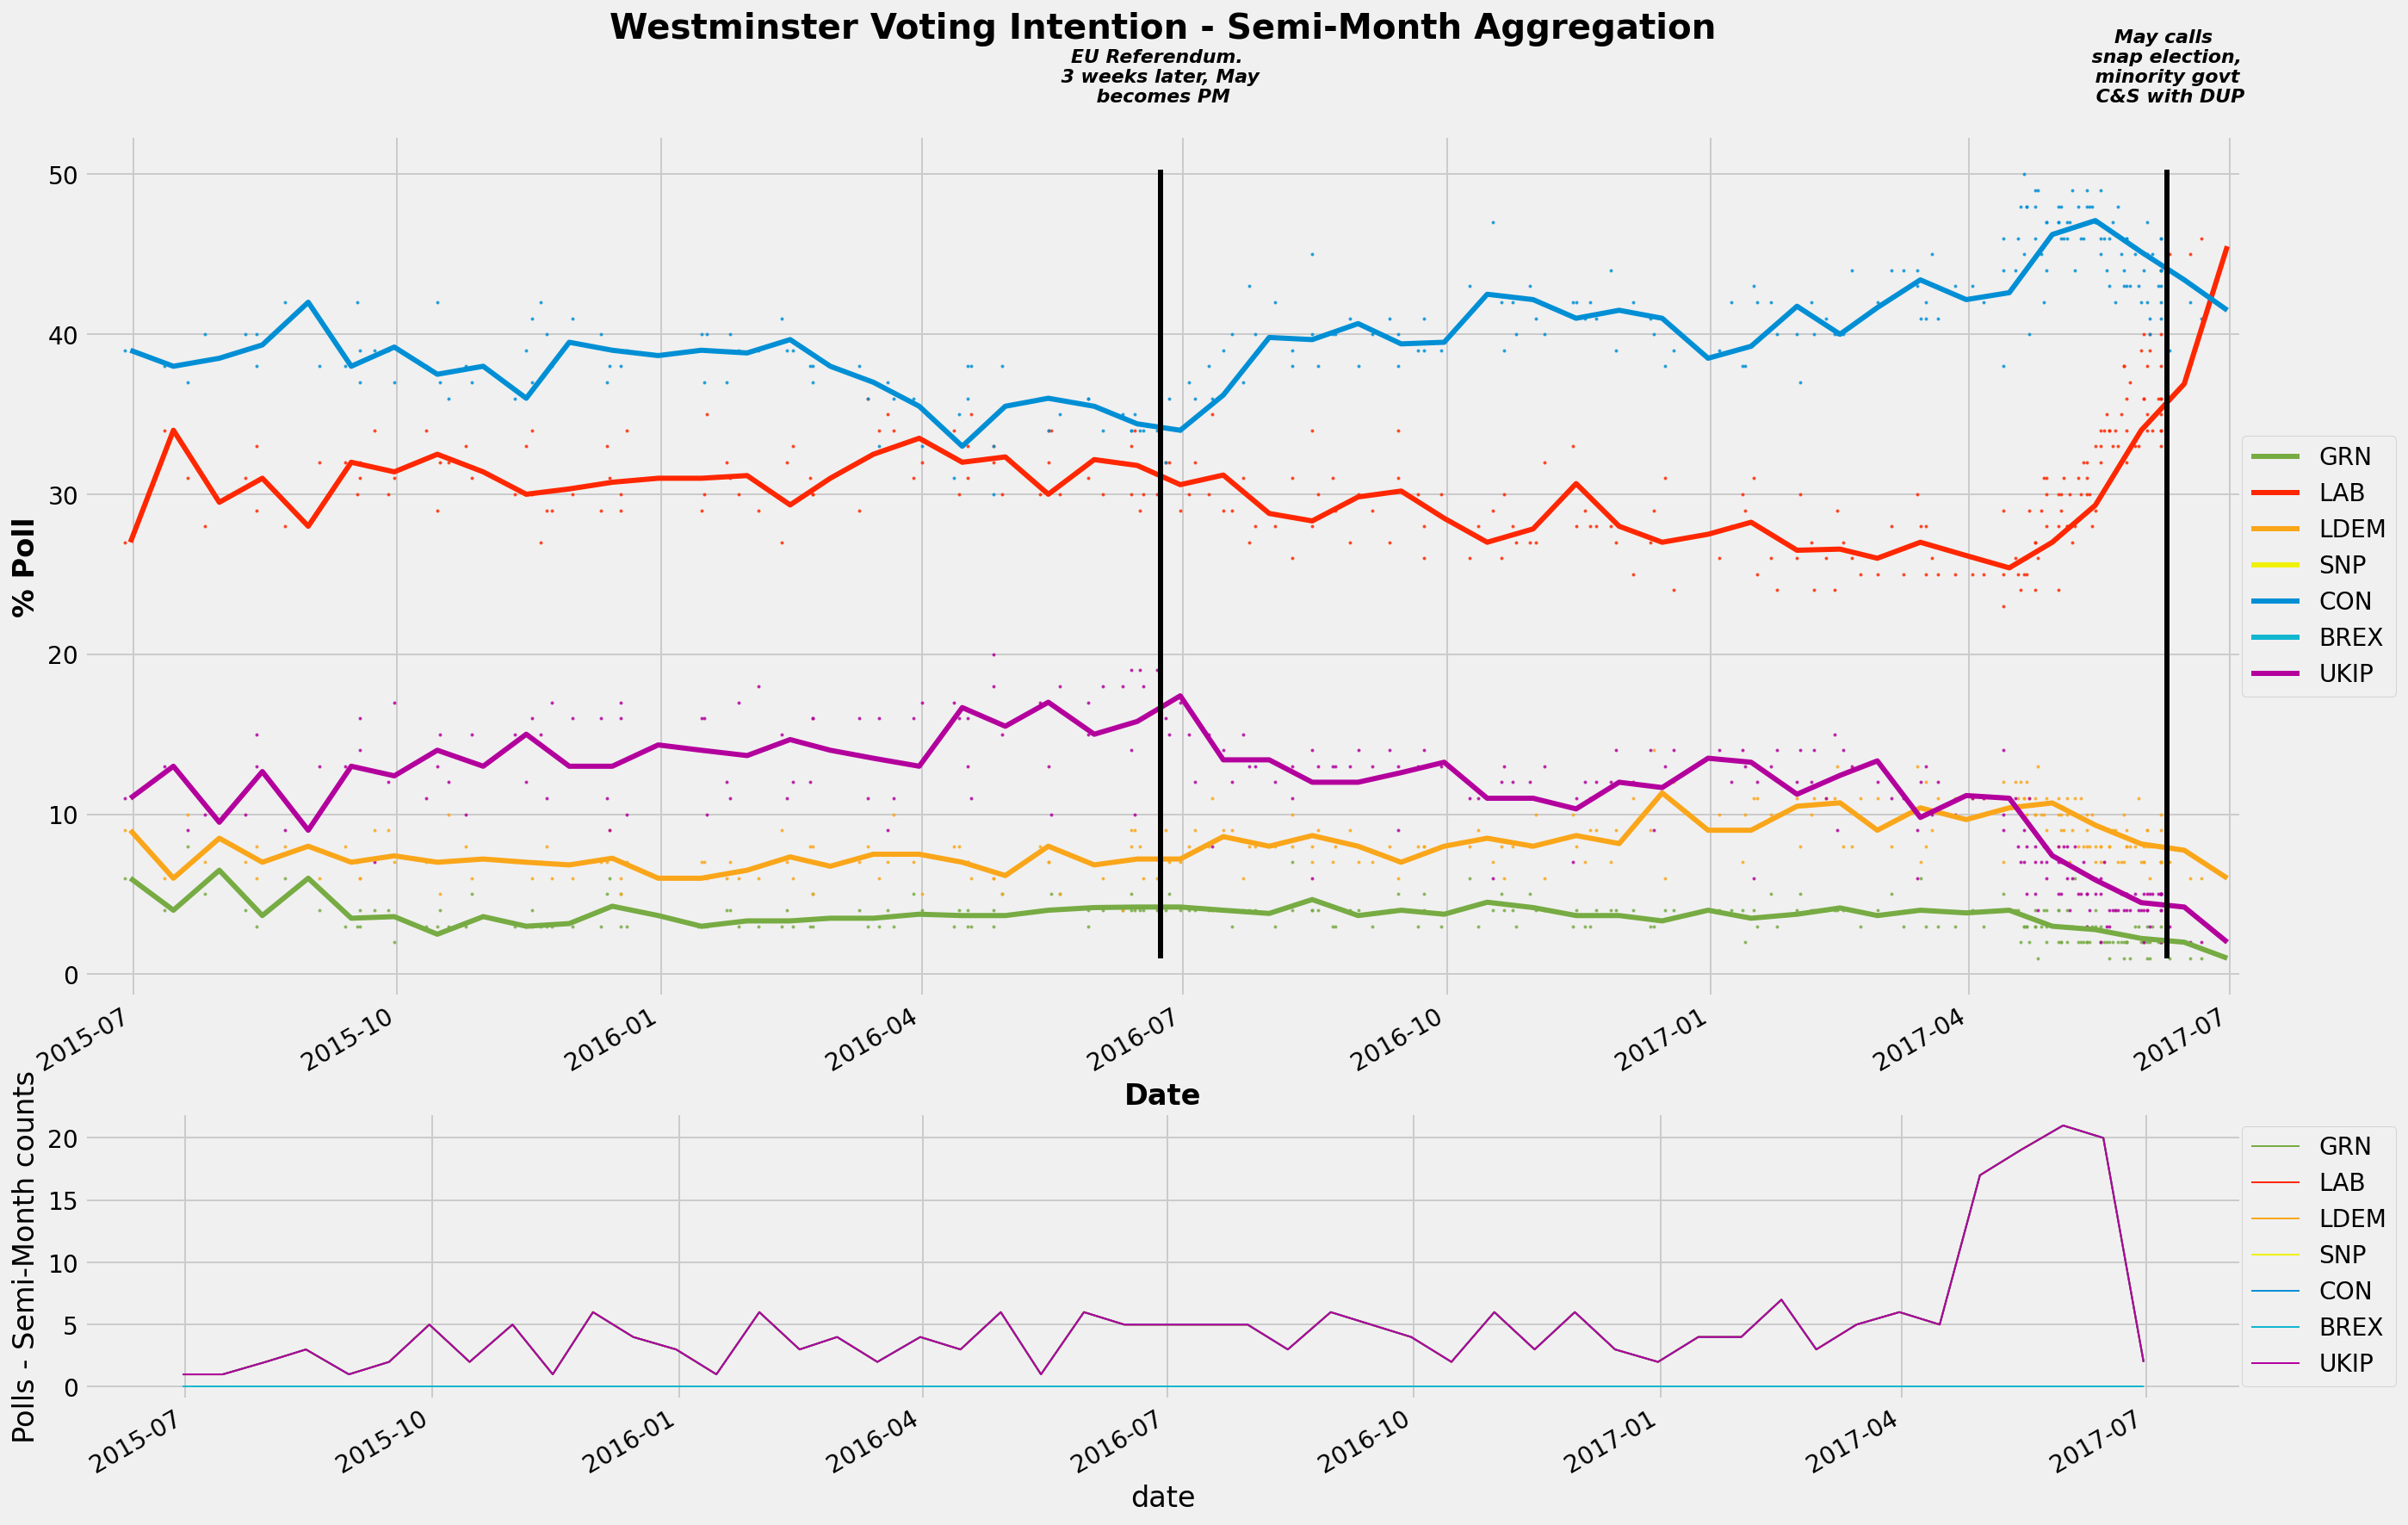

In [32]:
fig, ax = plot_vote_intention(df[(df.index >= pd.to_datetime("23 June 2015")) & (df.index <= pd.to_datetime("23 June 2017"))], agg="SM", add_lifetime_context=True)
ax.texts = [text_obj for text_obj in ax.texts
 if (text_obj._x >= pd.to_datetime("23 June 2015")) & (text_obj._x <= pd.to_datetime("23 June 2017"))]